In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import math

from functools import reduce
from sklearn.metrics import r2_score

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
#import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# libraries for save the model
import pickle

In [2]:
dataSet = pd.read_csv("D:\py projects\Appliance energy prediction\energydata_complete.csv")

# DATA SET

### General Overview

In [3]:
dataSet.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

### Shape of DataSet

In [4]:
dataSet.shape

(19735, 29)

### Information of DataSet

In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Descriptive Statistics

In [6]:
dataSet.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [7]:
all_column_stats = dataSet.describe()

all_column_stats = all_column_stats.drop(['count', 'min', 'max'])

num_columns = len(all_column_stats.columns)
num_rows = (num_columns - 1) // 3 + 1

fig = make_subplots(rows=num_rows, cols=3, subplot_titles=all_column_stats.columns)
for i, column in enumerate(all_column_stats.columns):
    row_num = i // 3 + 1
    col_num = i % 3 + 1
    
    # Select column statistics
    column_stats = all_column_stats[column]
    
    # Add bar trace to the subplot
    fig.add_trace(
        go.Bar(
            x=column_stats.index,
            y=column_stats.values,
            marker_color=px.colors.qualitative.Set3,
            texttemplate='%{y:.2s}',
            textposition='inside',
        ),
        row=row_num,
        col=col_num,
    )
    
    # Update subplot layout
    fig.update_xaxes(title_text=column, row=row_num, col=col_num)
    fig.update_yaxes(title_text='Values', row=row_num, col=col_num)

# Update layout for the entire figure
fig.update_layout(showlegend=False, height=200 * num_rows, width=900, title_text="Descriptive Statistics")
fig.show()

In [8]:
#rename the columns
dataSet.rename(columns={'T1': 'temp_kitchen', 'RH_1':'hu_Kitchen', 'T2':'temp_living_room', 'RH_2': 'hu_living', 'T3':'temp_Laundry_room',
       'RH_3':'hu_laundry', 'T4':'temp_office_room', 'RH_4':'hu_office', 'T5':'temp_bathroom', 'RH_5':'hu_bath', 'T6':'temp_build_out'
       , 'RH_6':'hu_build_out', 'T7':'temp_ironing_room', 'RH_7':'hu_ironing_room', 'T8':'temp_teen_room',
       'RH_8':'hu_teen', 'T9':'temp_parents_room', 'RH_9':'hu_parent', 'T_out':'temp_out', 'RH_out':'out_humidity'},inplace = True)
     

In [9]:
dataSet.columns

Index(['date', 'Appliances', 'lights', 'temp_kitchen', 'hu_Kitchen',
       'temp_living_room', 'hu_living', 'temp_Laundry_room', 'hu_laundry',
       'temp_office_room', 'hu_office', 'temp_bathroom', 'hu_bath',
       'temp_build_out', 'hu_build_out', 'temp_ironing_room',
       'hu_ironing_room', 'temp_teen_room', 'hu_teen', 'temp_parents_room',
       'hu_parent', 'temp_out', 'Press_mm_hg', 'out_humidity', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
dataSet.head()

date  Appliances  lights  temp_kitchen  hu_Kitchen  \
0  2016-01-11 17:00:00          60      30         19.89   47.596667   
1  2016-01-11 17:10:00          60      30         19.89   46.693333   
2  2016-01-11 17:20:00          50      30         19.89   46.300000   
3  2016-01-11 17:30:00          50      40         19.89   46.066667   
4  2016-01-11 17:40:00          60      40         19.89   46.333333   

   temp_living_room  hu_living  temp_Laundry_room  hu_laundry  \
0              19.2  44.790000              19.79   44.730000   
1              19.2  44.722500              19.79   44.790000   
2              19.2  44.626667              19.79   44.933333   
3              19.2  44.590000              19.79   45.000000   
4              19.2  44.530000              19.79   45.000000   

   temp_office_room  ...  temp_parents_room  hu_parent  temp_out  Press_mm_hg  \
0         19.000000  ...          17.033333      45.53  6.600000        733.5   
1         19.000000  ...          17.066667      45.56  6.483333        733.6   
2         18.926667  ...          17.000000      45.50  6.366667        733.7   
3         18.890000  ...          17.000000      45.40  6.250000        733.8   
4         18.890000  ...          17.000000      45.40  6.133333        733.9   

   out_humidity  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0          92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1          92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2          92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3          92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4          92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [11]:
# Assuming your dataframe has a 'timestamp' column
# To generate a sample dataframe for demonstration:


# Convert the 'timestamp' column to datetime
dataSet['date']=pd.to_datetime(dataSet['date'])

#Getting the months and days from date

dataSet['month'] = dataSet['date'].dt.month
dataSet['weekday'] = dataSet['date'].dt.weekday
dataSet['hour'] = dataSet['date'].dt.hour

#drop the date column
dataSet.drop('date',axis=1,inplace=True)


# Print the updated dataframe
dataSet.head()

Appliances  lights  temp_kitchen  hu_Kitchen  temp_living_room  hu_living  \
0          60      30         19.89   47.596667              19.2  44.790000   
1          60      30         19.89   46.693333              19.2  44.722500   
2          50      30         19.89   46.300000              19.2  44.626667   
3          50      40         19.89   46.066667              19.2  44.590000   
4          60      40         19.89   46.333333              19.2  44.530000   

   temp_Laundry_room  hu_laundry  temp_office_room  hu_office  ...  \
0              19.79   44.730000         19.000000  45.566667  ...   
1              19.79   44.790000         19.000000  45.992500  ...   
2              19.79   44.933333         18.926667  45.890000  ...   
3              19.79   45.000000         18.890000  45.723333  ...   
4              19.79   45.000000         18.890000  45.530000  ...   

   Press_mm_hg  out_humidity  Windspeed  Visibility  Tdewpoint        rv1  \
0        733.5          92.0   7.000000   63.000000        5.3  13.275433   
1        733.6          92.0   6.666667   59.166667        5.2  18.606195   
2        733.7          92.0   6.333333   55.333333        5.1  28.642668   
3        733.8          92.0   6.000000   51.500000        5.0  45.410389   
4        733.9          92.0   5.666667   47.666667        4.9  10.084097   

         rv2  month  weekday  hour  
0  13.275433      1        0    17  
1  18.606195      1        0    17  
2  28.642668      1        0    17  
3  45.410389      1        0    17  
4  10.084097      1        0    17  

[5 rows x 31 columns]

In [12]:
temp_cols=['temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','temp_build_out','temp_ironing_room','temp_teen_room','temp_parents_room']
hu_cols=['hu_Kitchen','hu_living','hu_laundry', 'hu_office','hu_bath','hu_build_out','hu_ironing_room','hu_teen','hu_parent']
light_cols=['light']
weather_cols=['temp_out','out_humidity',"Tdewpoint","Press_mm_hg","Windspeed","Visibility"]
date_col = ['month','weekday','hour']
random_col = ["rv1","rv2"]

# EDA

### Univariate Analysis

In [13]:
dataVisual = dataSet.copy()

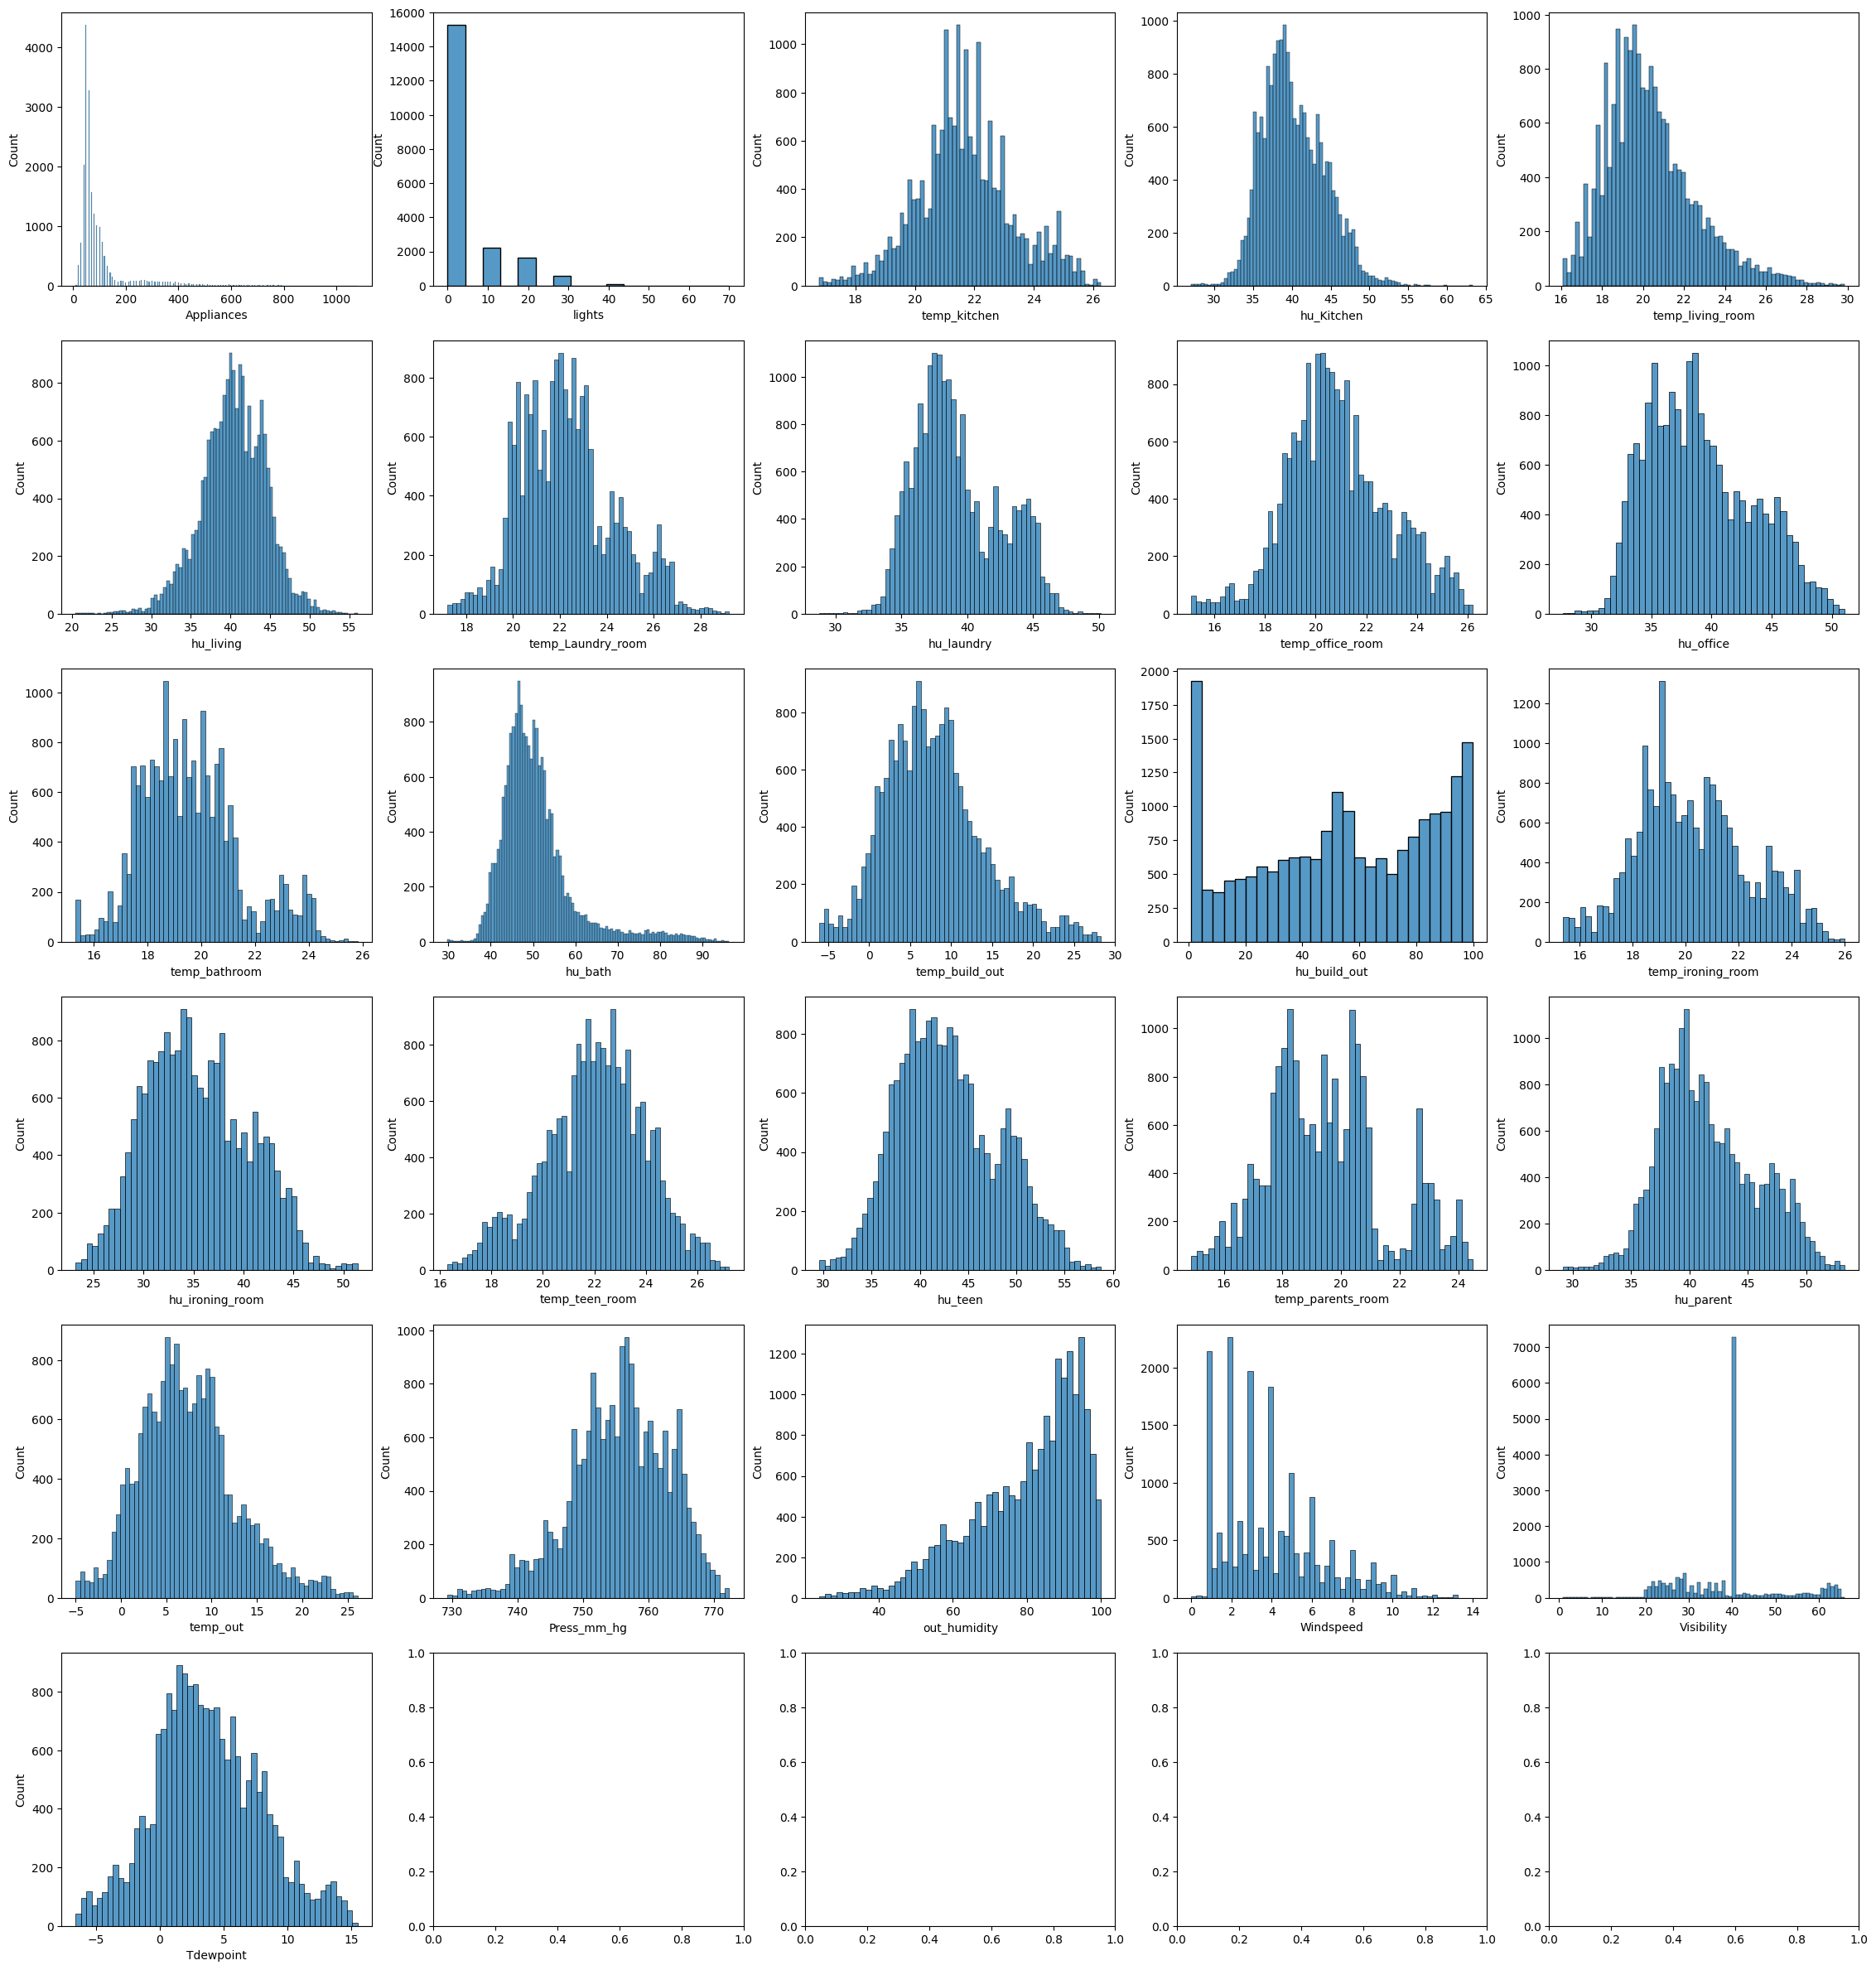

In [14]:
#Histogram plot of every individual column

ls = []
colName = [j for j in dataVisual.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.histplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k], data=dataVisual)
    

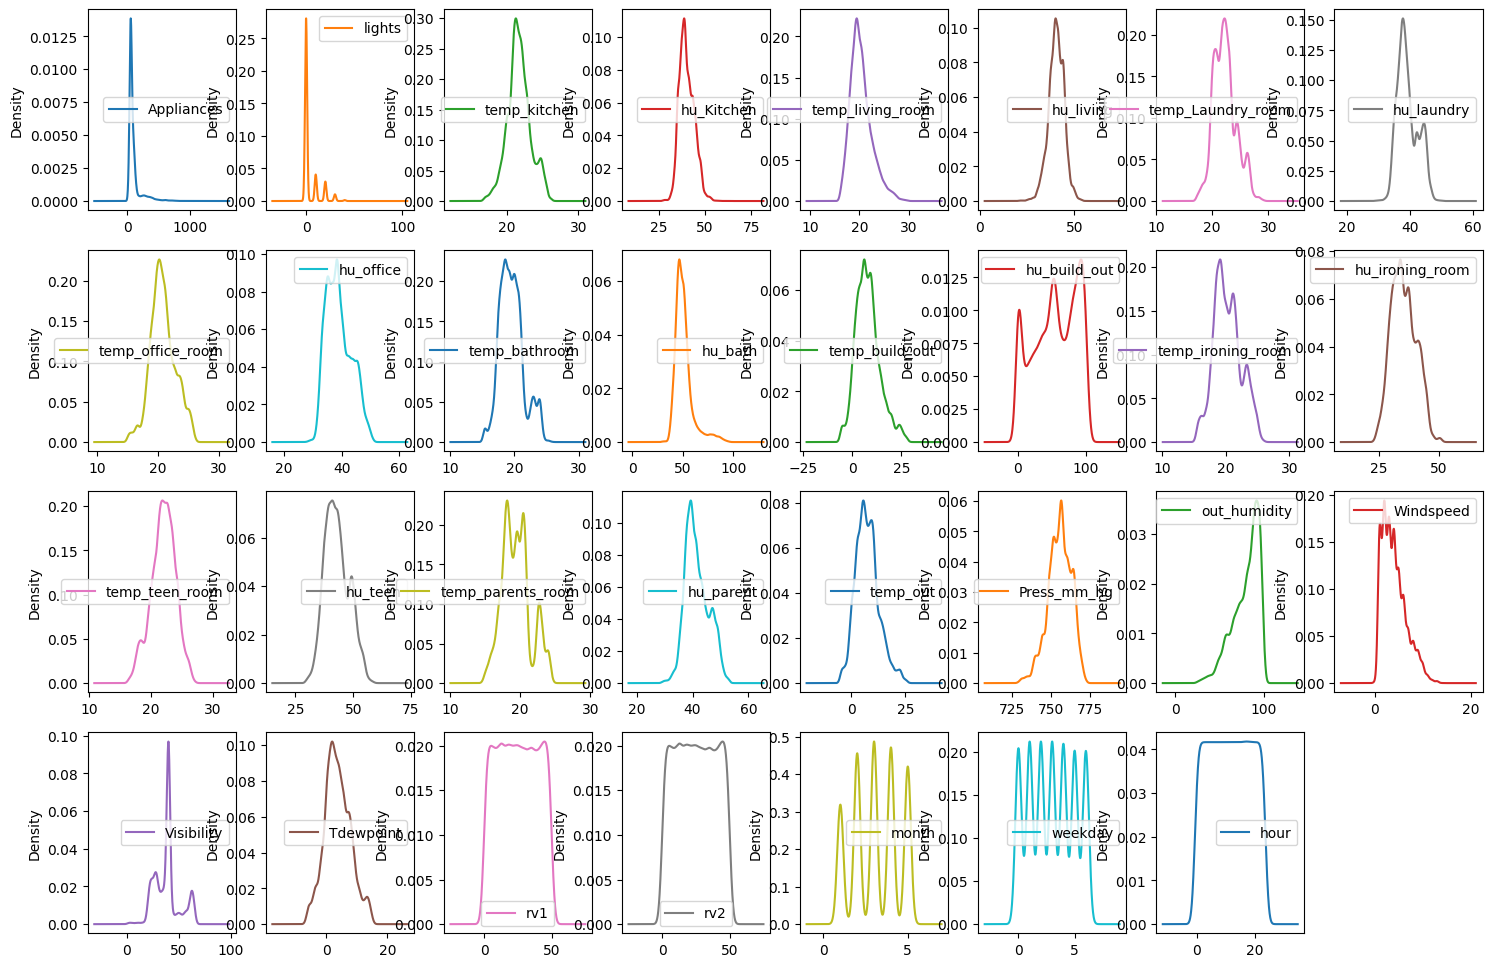

In [15]:
#Distplot of every individual column

dataVisual.plot(kind='density', subplots=True, layout=(4,8), sharex=False,figsize=(18,12))
plt.show()

### Bivariate Analysis

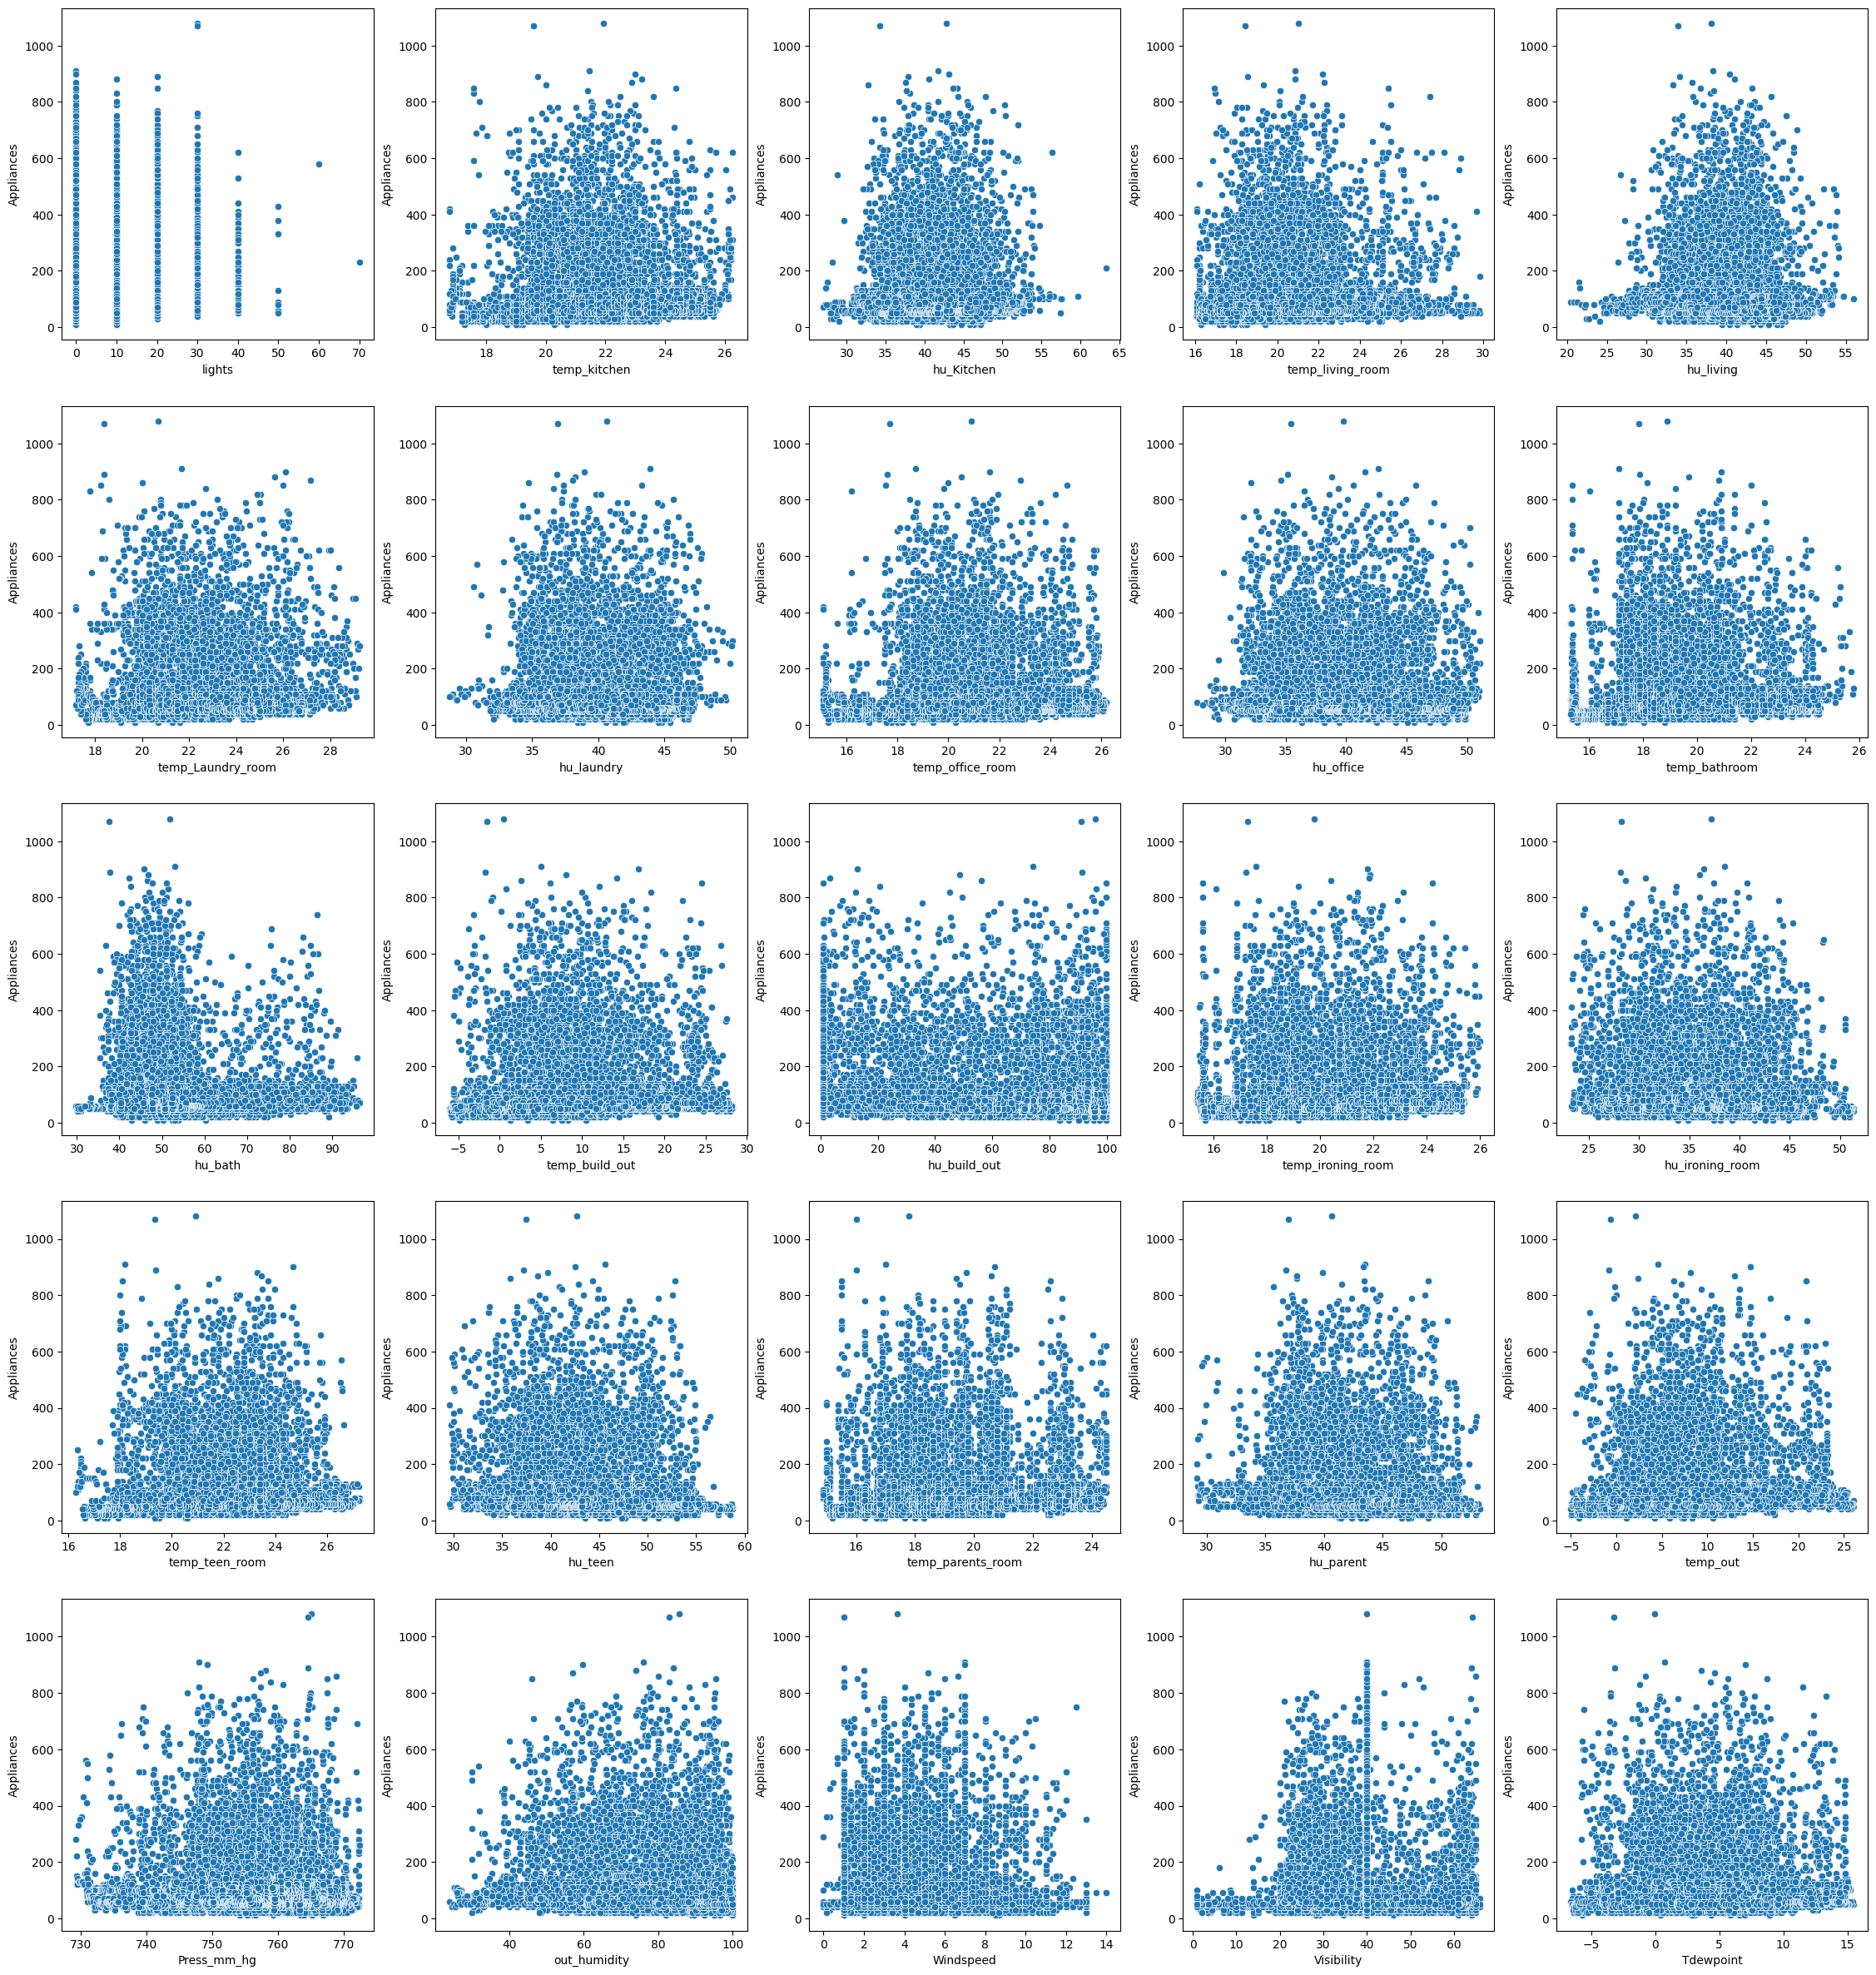

In [16]:
#scatter plot

b = 0
while b < 7:
    for i in range(5):
        ls.append((b, i))
    b+=1
fig, ax = plt.subplots(5, 5, figsize=(28, 30))
for k in range(25):
    sns.scatterplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k+1], y=colName[0], data=dataVisual)

<Axes: >

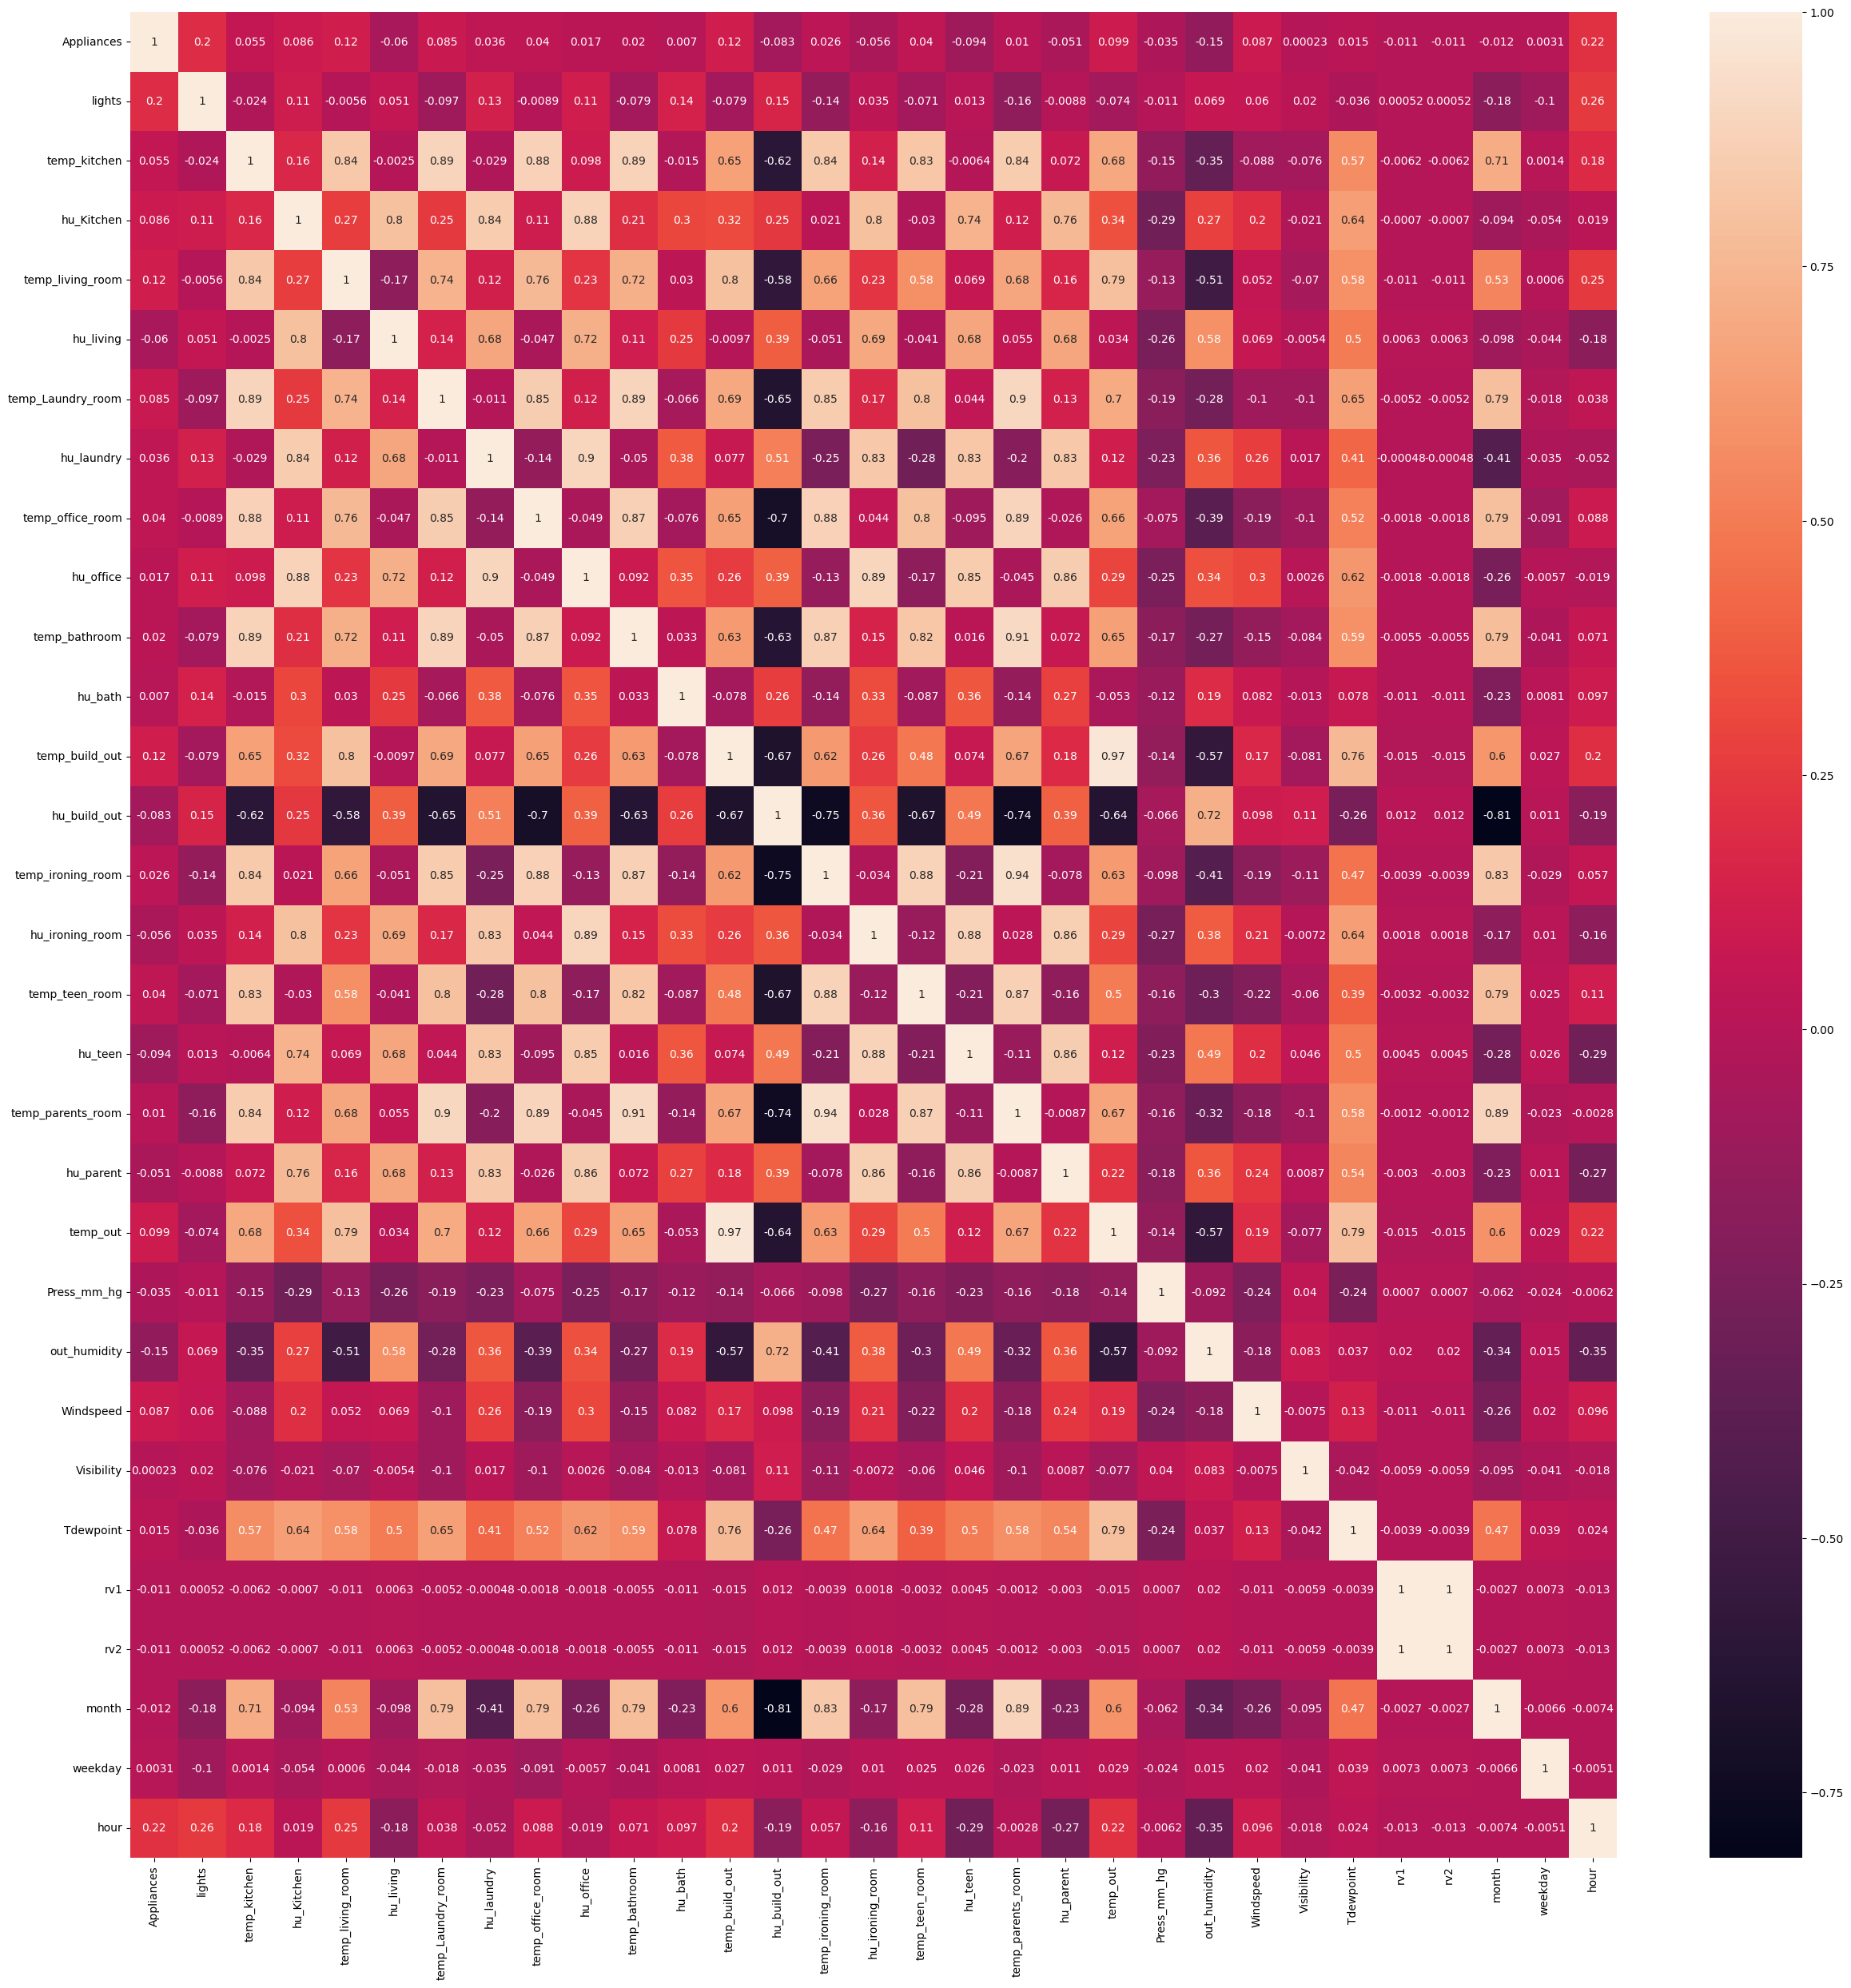

In [17]:
#Heatmap

corr = dataVisual.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

# Preprocessing Data

### Data Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(dataVisual), columns=dataVisual.columns)
dataTrans.head()

Appliances    lights  temp_kitchen  hu_Kitchen  temp_living_room  \
0    0.046729  0.428571       0.32735    0.566187          0.225345   
1    0.046729  0.428571       0.32735    0.541326          0.225345   
2    0.037383  0.428571       0.32735    0.530502          0.225345   
3    0.037383  0.571429       0.32735    0.524080          0.225345   
4    0.046729  0.571429       0.32735    0.531419          0.225345   

   hu_living  temp_Laundry_room  hu_laundry  temp_office_room  hu_office  ...  \
0   0.684038           0.215188    0.746066          0.351351   0.764262  ...   
1   0.682140           0.215188    0.748871          0.351351   0.782437  ...   
2   0.679445           0.215188    0.755569          0.344745   0.778062  ...   
3   0.678414           0.215188    0.758685          0.341441   0.770949  ...   
4   0.676727           0.215188    0.758685          0.341441   0.762697  ...   

   Press_mm_hg  out_humidity  Windspeed  Visibility  Tdewpoint       rv1  \
0     0.097674      0.894737   0.500000    0.953846   0.538462  0.265449   
1     0.100000      0.894737   0.476190    0.894872   0.533937  0.372083   
2     0.102326      0.894737   0.452381    0.835897   0.529412  0.572848   
3     0.104651      0.894737   0.428571    0.776923   0.524887  0.908261   
4     0.106977      0.894737   0.404762    0.717949   0.520362  0.201611   

        rv2  month  weekday     hour  
0  0.265449    0.0      0.0  0.73913  
1  0.372083    0.0      0.0  0.73913  
2  0.572848    0.0      0.0  0.73913  
3  0.908261    0.0      0.0  0.73913  
4  0.201611    0.0      0.0  0.73913  

[5 rows x 31 columns]

### Histogram Plot after Normalization

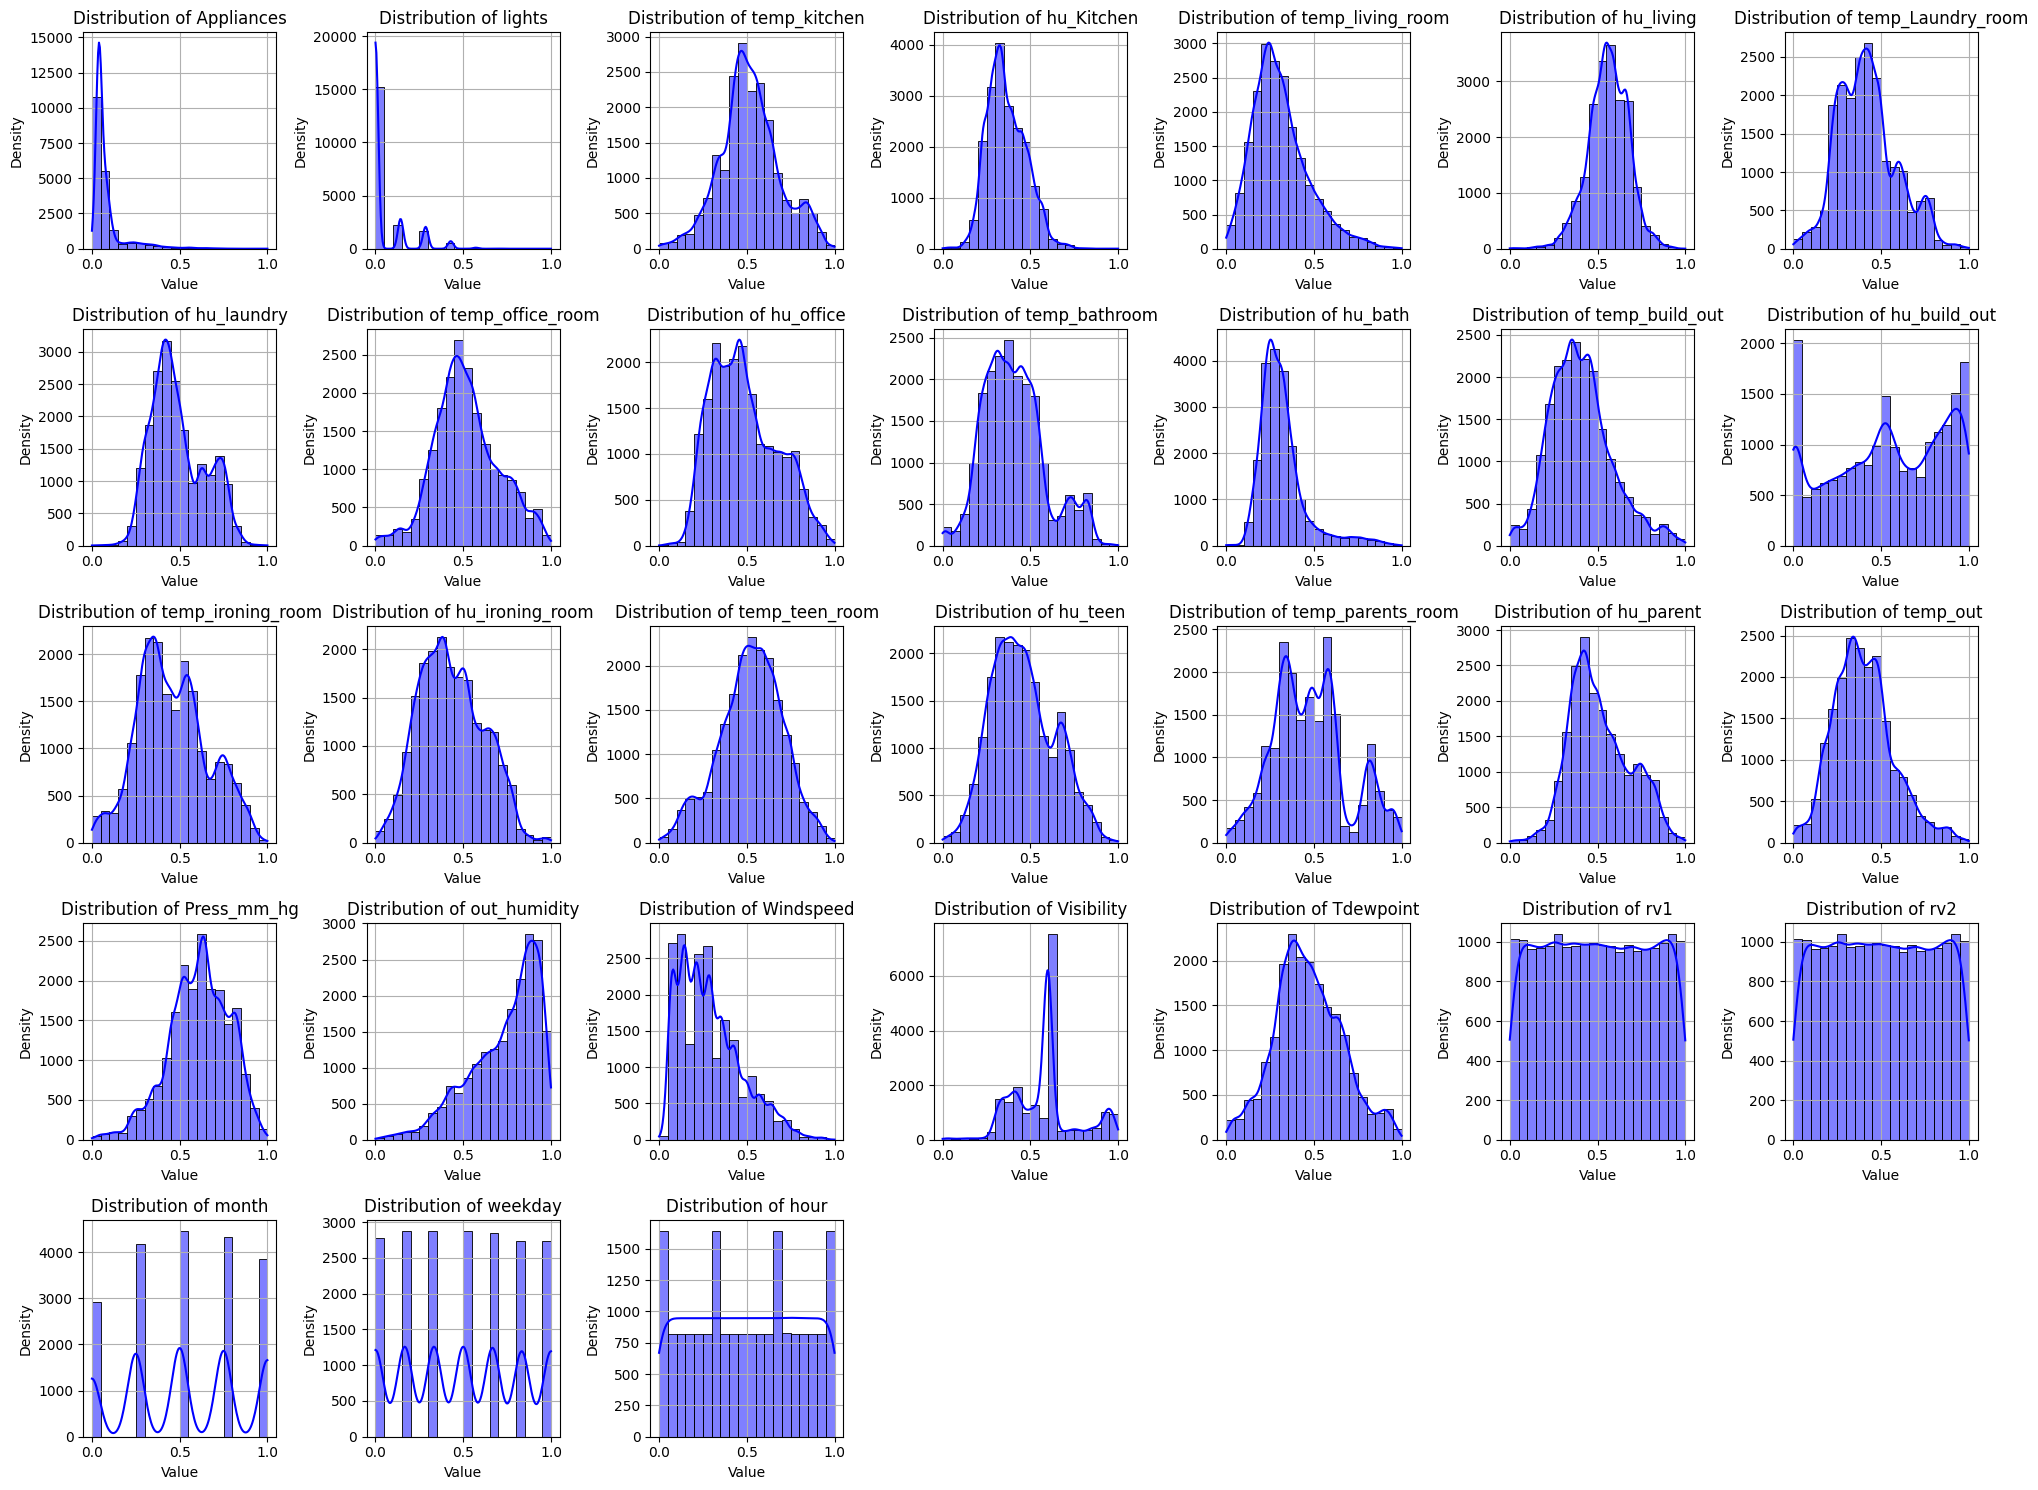

In [19]:
#Histogram plot of every individual column

num_columns = len(dataTrans.columns)
num_rows = math.ceil(num_columns / 7)

# Set up subplots
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows * 3))  # Adjust figsize as needed

# Generate distribution plots for each column
for i, column in enumerate(dataTrans.columns):
    row_num = i // 7
    col_num = i % 7
    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]
    sns.histplot(dataTrans[column], bins=20, color='blue', kde=True, ax=ax)  # Using Seaborn's distplot
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(True)

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    row_num = i // 7
    col_num = i % 7
    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Handling Outliers

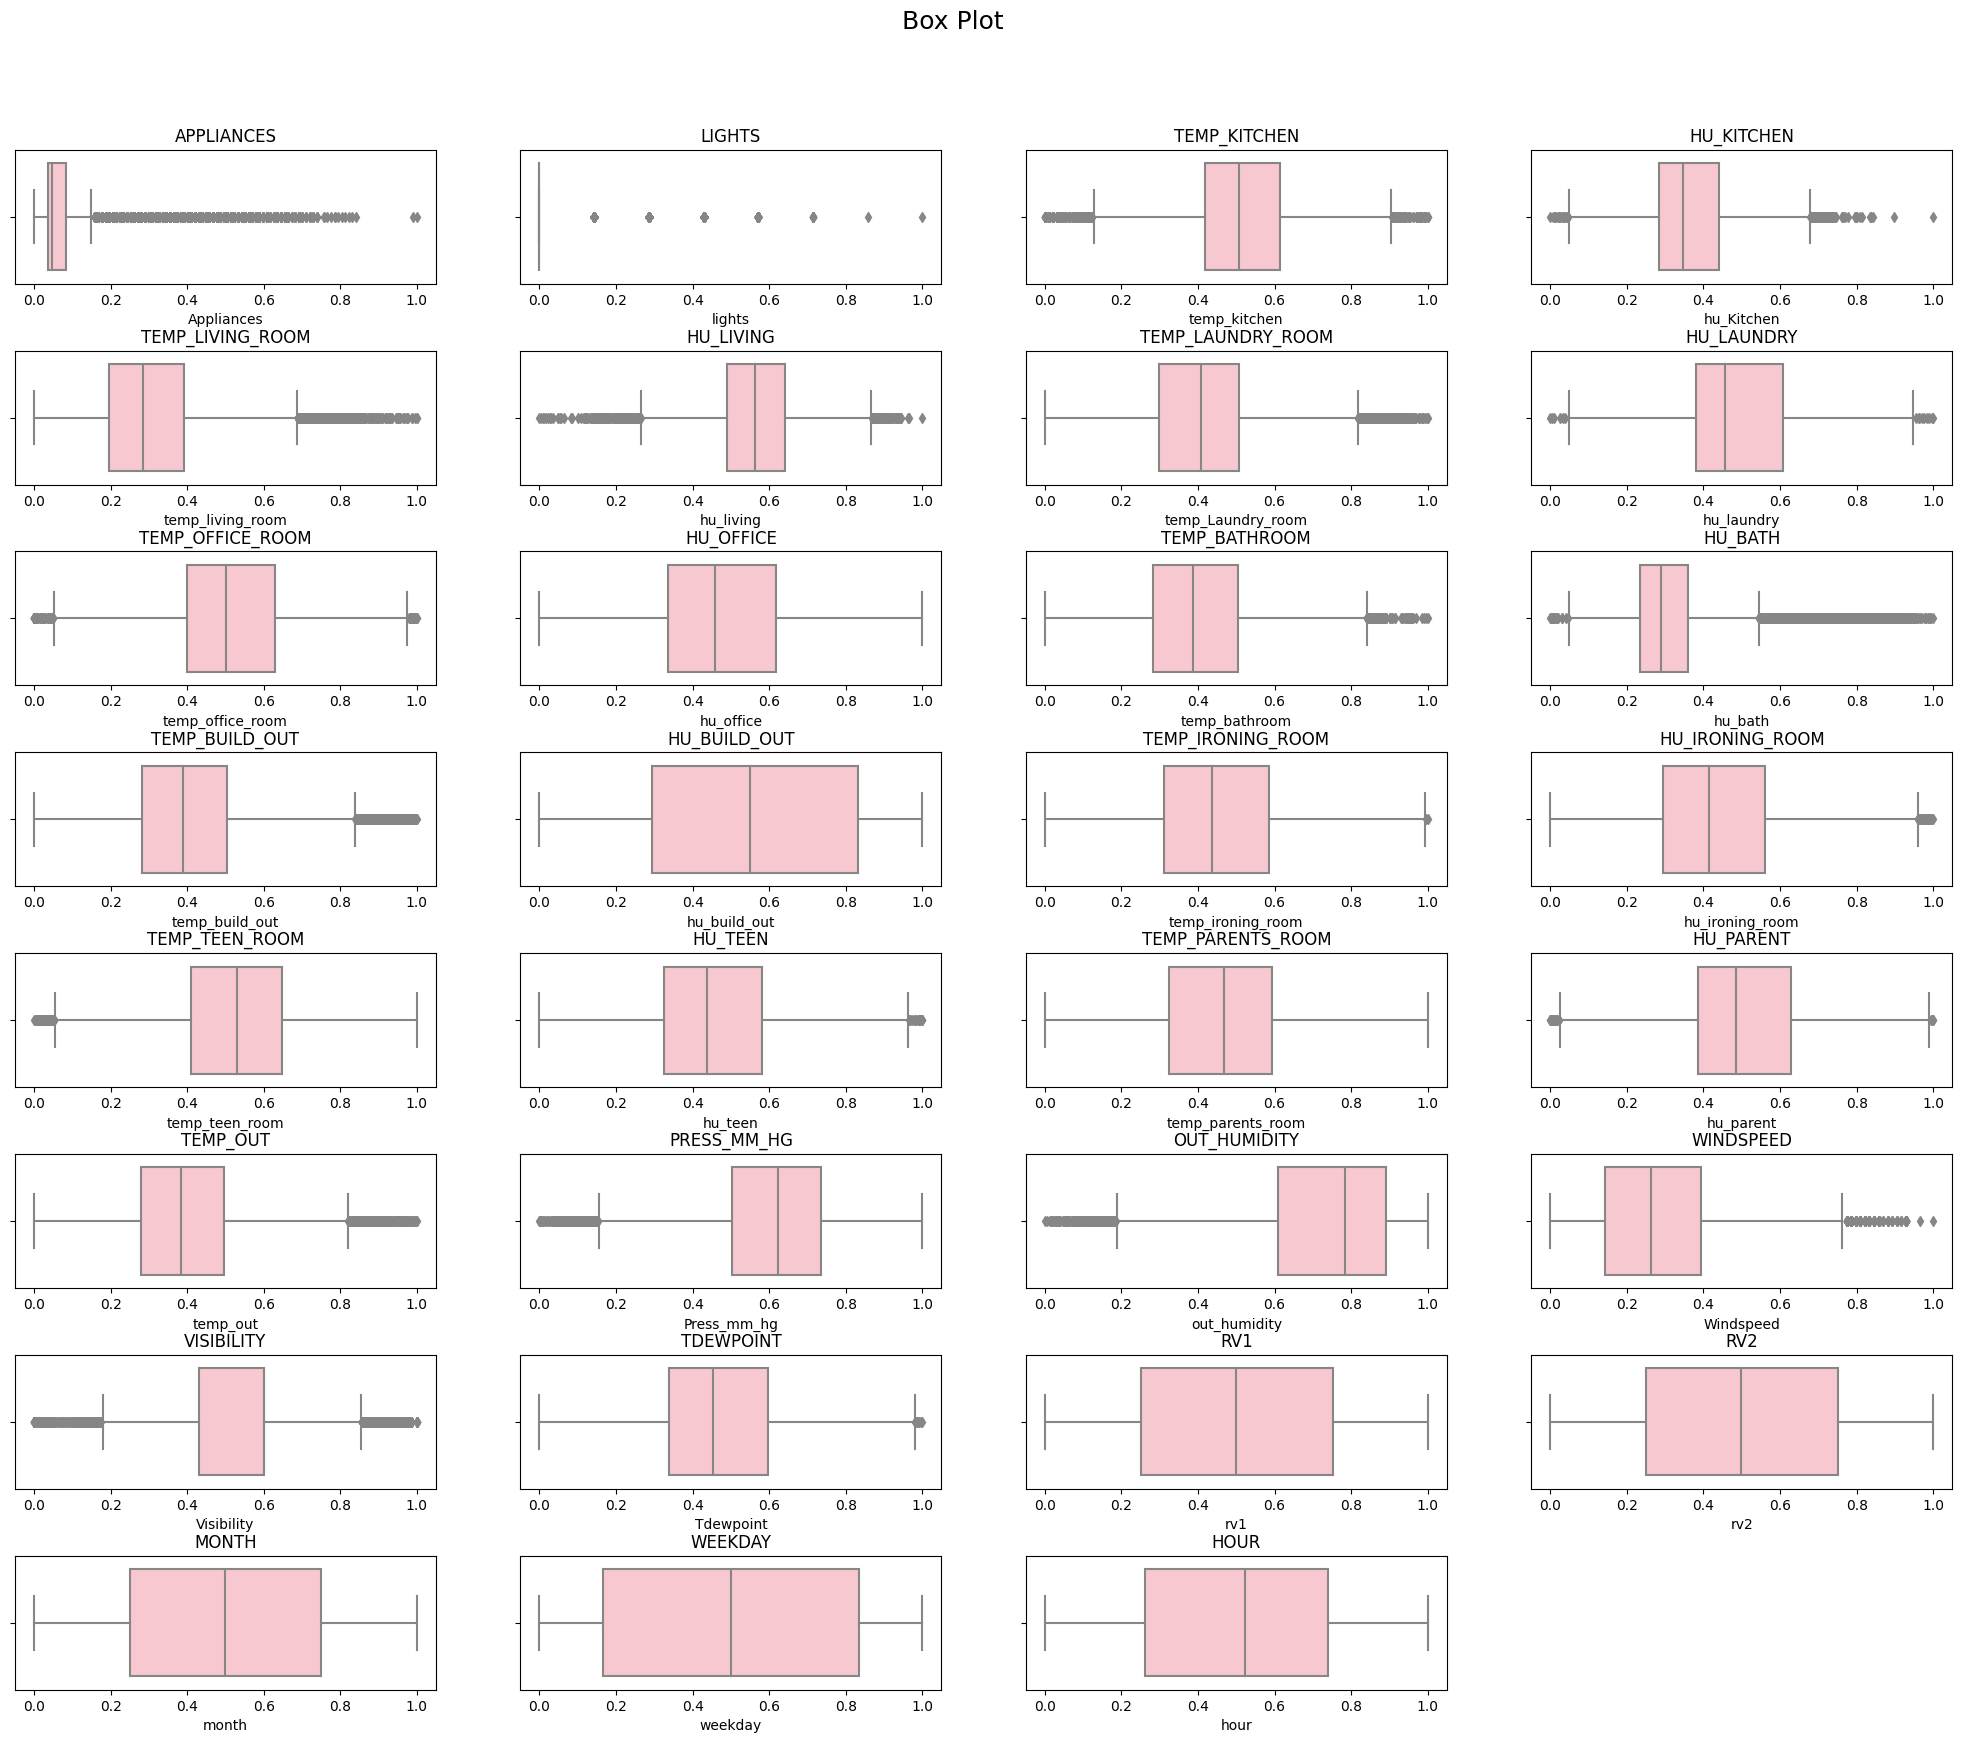

In [20]:
df= dataTrans.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [21]:
def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = find_outliers_iqr(dataTrans)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))


Number of outliers per column:
lights               4483
Visibility           2522
Appliances           2138
hu_bath              1330
temp_living_room      546
temp_kitchen          515
temp_build_out        513
temp_out              436
out_humidity          239
hu_living             235
Press_mm_hg           219
temp_Laundry_room     217
Windspeed             214
temp_office_room      186
temp_bathroom         179
hu_Kitchen            146
temp_teen_room         79
hu_ironing_room        42
hu_parent              21
hu_teen                17
hu_laundry             15
Tdewpoint              10
temp_ironing_room       2
temp_parents_room       0
hu_build_out            0
hu_office               0
rv1                     0
rv2                     0
month                   0
weekday                 0
hour                    0
dtype: int64


In [22]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Appliances 

Percentiles: 25th=0.037, 75th=0.084, IQR=0.047

lower = -0.03271028037383178 and upper = 0.15420560747663553 
 
Identified outliers: 2138
Appliances Outliers Removed

-------

lights 

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000

lower = 0.0 and upper = 0.0 
 
Identified outliers: 4483
lights Outliers Removed

-------

temp_kitchen 

Percentiles: 25th=0.419, 75th=0.614, IQR=0.194

lower = 0.12777191129883825 and upper = 0.9049630411826826 
 
Identified outliers: 515
temp_kitchen Outliers Removed

-------

hu_Kitchen 

Percentiles: 25th=0.284, 75th=0.442, IQR=0.158

lower = 0.047059902761211525 and upper = 0.6781946610402754 
 
Identified outliers: 146
hu_Kitchen Outliers Removed

-------

temp_living_room 

Percentiles: 25th=0.196, 75th=0.393, IQR=0.197

lower = -0.09995153864792872 and upper = 0.688030046038283 
 
Identified outliers: 546
temp_living_room Outliers Removed

-------

hu_living 

Percentiles: 25th=0.490, 75th=0.641, IQR=0.151

lower = 0.26422345112006806 

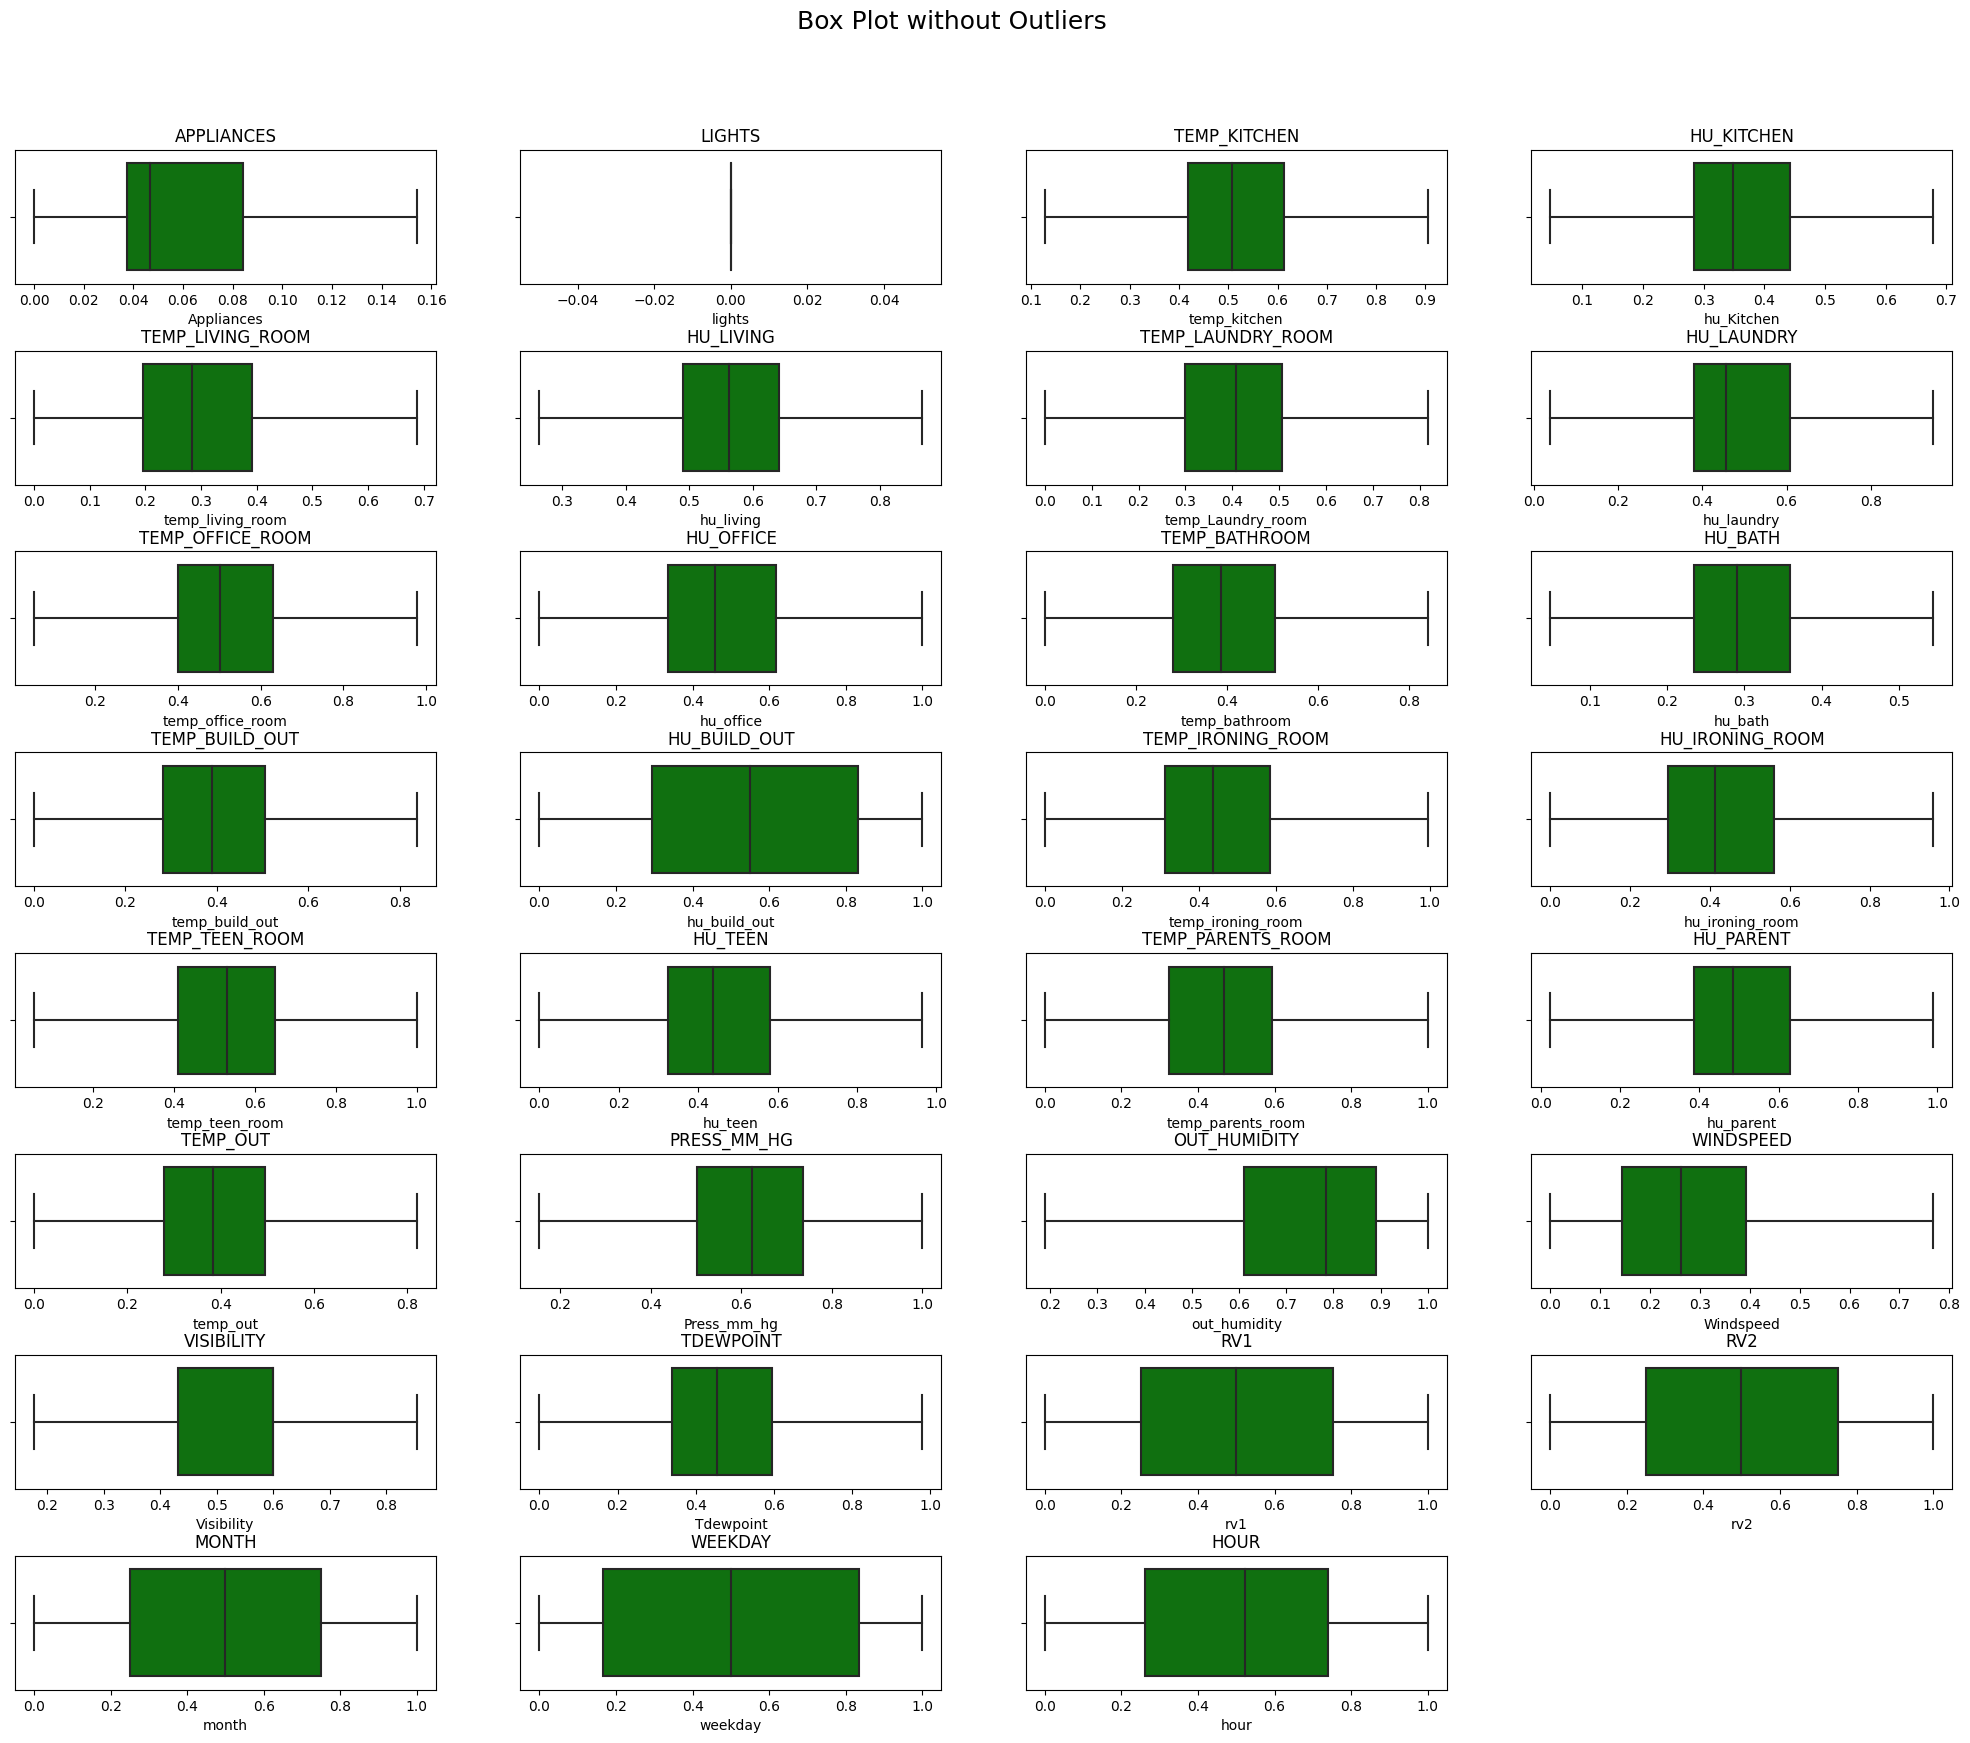

In [23]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

# Feature Manipulation & Selection


### Feature Manipulation

In [24]:
# Manipulate Features to minimize feature correlation and create new features
# create a column average building temperature based on all temperature
df['Average_building_Temperature']=df[['temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','temp_ironing_room','temp_teen_room','temp_parents_room']].mean(axis=1)
#create a column of difference between outside and inside temperature
df['Temperature_difference']=abs(df['Average_building_Temperature']-df['temp_build_out'])

#create a column average building humidity
df['Average_building_humidity']=df[['hu_Kitchen','hu_living','hu_laundry', 'hu_office','hu_bath','hu_ironing_room','hu_teen','hu_parent']].mean(axis=1)
#create a column of difference between outside and inside building humidity
df['Humidity_difference']=abs(df['hu_build_out']-df['Average_building_humidity'])

### Feature Selection

In [25]:
# Select your features wisely to avoid overfitting
#drop rv1 and rv2
df.drop('rv1',axis=1,inplace=True)
df.drop('rv2',axis=1,inplace=True)
df.head()   

Appliances  lights  temp_kitchen  hu_Kitchen  temp_living_room  hu_living  \
0    0.046729     0.0       0.32735    0.566187          0.225345   0.684038   
1    0.046729     0.0       0.32735    0.541326          0.225345   0.682140   
2    0.037383     0.0       0.32735    0.530502          0.225345   0.679445   
3    0.037383     0.0       0.32735    0.524080          0.225345   0.678414   
4    0.046729     0.0       0.32735    0.531419          0.225345   0.676727   

   temp_Laundry_room  hu_laundry  temp_office_room  hu_office  ...  Windspeed  \
0           0.215188    0.746066          0.351351   0.764262  ...   0.500000   
1           0.215188    0.748871          0.351351   0.782437  ...   0.476190   
2           0.215188    0.755569          0.344745   0.778062  ...   0.452381   
3           0.215188    0.758685          0.341441   0.770949  ...   0.428571   
4           0.215188    0.758685          0.341441   0.762697  ...   0.404762   

   Visibility  Tdewpoint  month  weekday     hour  \
0    0.853846   0.538462    0.0      0.0  0.73913   
1    0.853846   0.533937    0.0      0.0  0.73913   
2    0.835897   0.529412    0.0      0.0  0.73913   
3    0.776923   0.524887    0.0      0.0  0.73913   
4    0.717949   0.520362    0.0      0.0  0.73913   

   Average_building_Temperature  Temperature_difference  \
0                      0.232712                0.148358   
1                      0.233145                0.142297   
2                      0.231452                0.136034   
3                      0.229110                0.134690   
4                      0.230293                0.131566   

   Average_building_humidity  Humidity_difference  
0                   0.641797             0.200030  
1                   0.640777             0.199095  
2                   0.637728             0.192977  
3                   0.634544             0.198857  
4                   0.633953             0.214311  

[5 rows x 33 columns]

### Checking Multicollinearity

In [26]:
#create a function to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif['varabiles']= X.columns
  vif['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
  return (vif)
     

In [27]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances']]]).sort_values(by='VIF',ascending=False)

C:\Users\sahun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\sahun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



varabiles     VIF
1                   temp_kitchen     inf
13             temp_ironing_room     inf
30     Average_building_humidity     inf
28  Average_building_Temperature     inf
18                     hu_parent     inf
17             temp_parents_room     inf
2                     hu_Kitchen     inf
15                temp_teen_room     inf
14               hu_ironing_room     inf
16                       hu_teen     inf
4                      hu_living     inf
10                       hu_bath     inf
9                  temp_bathroom     inf
8                      hu_office     inf
7               temp_office_room     inf
6                     hu_laundry     inf
5              temp_Laundry_room     inf
3               temp_living_room     inf
19                      temp_out  460.57
11                temp_build_out  239.03
21                  out_humidity  223.50
24                     Tdewpoint  157.57
12                  hu_build_out   51.50
25                         month   43.38
20                   Press_mm_hg   19.56
23                    Visibility   14.15
27                          hour    7.79
31           Humidity_difference    6.69
22                     Windspeed    5.98
29        Temperature_difference    4.50
26                       weekday    3.57
0                         lights     NaN

In [28]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature']]]).sort_values(by='VIF',ascending=False)

varabiles     VIF
17  Average_building_humidity  311.04
9                out_humidity  140.93
7                    temp_out  137.66
5           temp_parents_room  136.90
1           temp_ironing_room  110.42
12                  Tdewpoint  107.72
6                   hu_parent   82.59
2             hu_ironing_room   81.19
4                     hu_teen   78.94
3              temp_teen_room   66.59
0                hu_build_out   42.50
13                      month   39.17
8                 Press_mm_hg   18.74
11                 Visibility   14.03
15                       hour    7.11
10                  Windspeed    5.83
18        Humidity_difference    5.34
16     Temperature_difference    3.93
14                    weekday    3.40

In [29]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity']]]).sort_values(by='VIF',ascending=False) 

varabiles    VIF
8                Tdewpoint  54.71
5                 temp_out  53.26
3                  hu_teen  52.14
1          hu_ironing_room  50.83
4                hu_parent  49.65
2           temp_teen_room  26.59
9                    month  19.85
0             hu_build_out  18.64
7               Visibility  12.54
11                    hour   5.56
6                Windspeed   5.42
13     Humidity_difference   5.08
12  Temperature_difference   3.37
10                 weekday   3.23

In [30]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room']]]).sort_values(by='VIF',ascending=False)

varabiles    VIF
1                temp_out  47.03
4               Tdewpoint  35.38
0            hu_build_out  12.38
3              Visibility  12.20
5                   month   9.46
2               Windspeed   5.37
9     Humidity_difference   4.91
7                    hour   4.19
8  Temperature_difference   3.21
6                 weekday   3.19

In [31]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room','Temperature_difference','temp_out','Visibility']]]).sort_values(by='VIF',ascending=False)   

varabiles    VIF
2            Tdewpoint  11.15
3                month   6.35
0         hu_build_out   5.08
6  Humidity_difference   4.17
1            Windspeed   3.96
5                 hour   3.56
4              weekday   3.15

In [32]:
# Select your features wisely to avoid overfitting
df_removed=df[[i for i in df.describe().columns if i not in ['lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room','Temperature_difference','temp_out','Visibility']]]

df_removed.head()

Appliances  hu_build_out  Windspeed  Tdewpoint  month  weekday     hour  \
0    0.046729      0.841827   0.500000   0.538462    0.0      0.0  0.73913   
1    0.046729      0.839872   0.476190   0.533937    0.0      0.0  0.73913   
2    0.037383      0.830704   0.452381   0.529412    0.0      0.0  0.73913   
3    0.037383      0.833401   0.428571   0.524887    0.0      0.0  0.73913   
4    0.046729      0.848264   0.404762   0.520362    0.0      0.0  0.73913   

   Humidity_difference  
0             0.200030  
1             0.199095  
2             0.192977  
3             0.198857  
4             0.214311

# Data Transformation

C:\Users\sahun\AppData\Local\Temp\ipykernel_20360\439226099.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sahun\AppData\Local\Temp\ipykernel_20360\439226099.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sahun\AppData\Local\Temp\ipykernel_20360\439226099.py:7: UserWarning:



`distplot` is a 

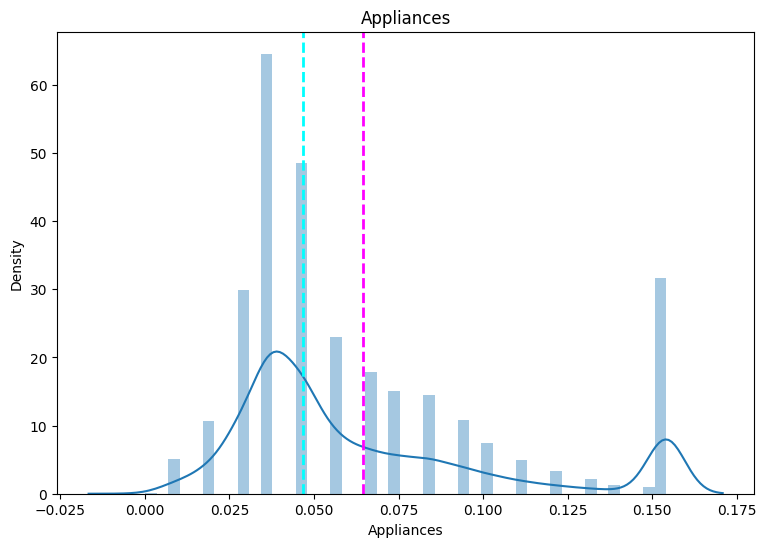

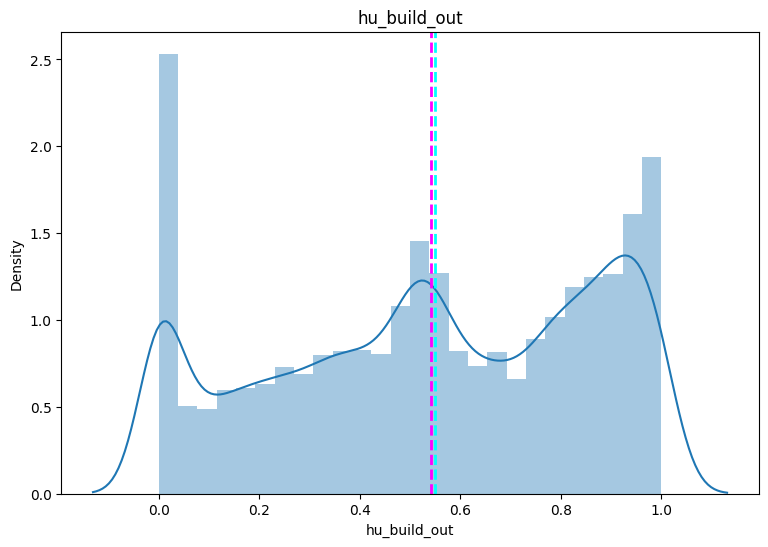

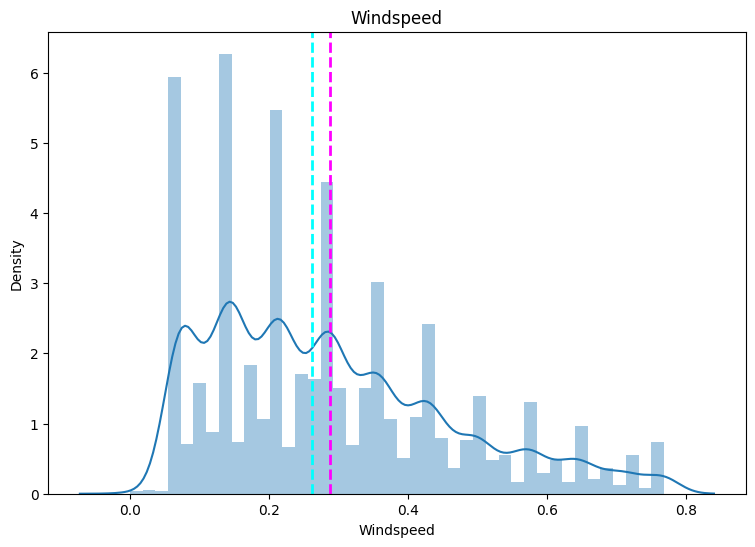

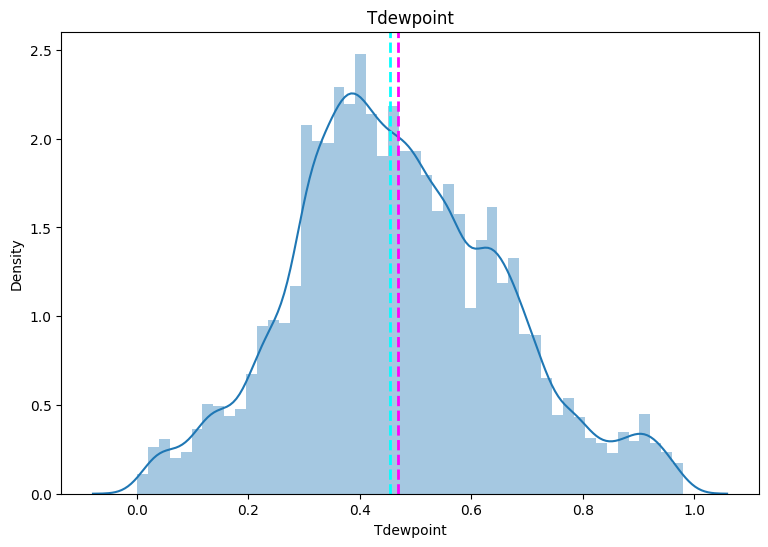

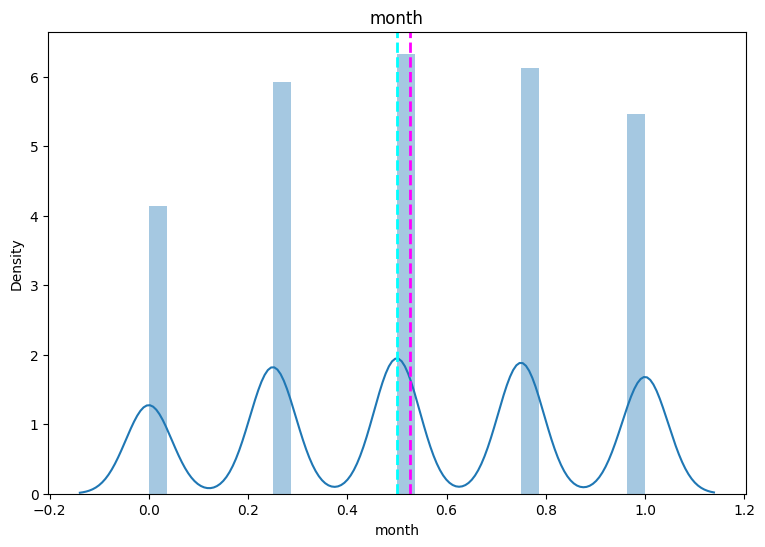

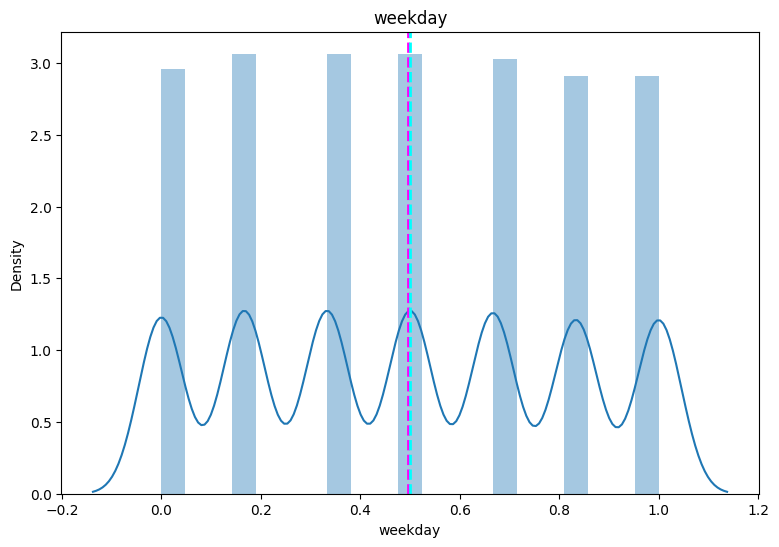

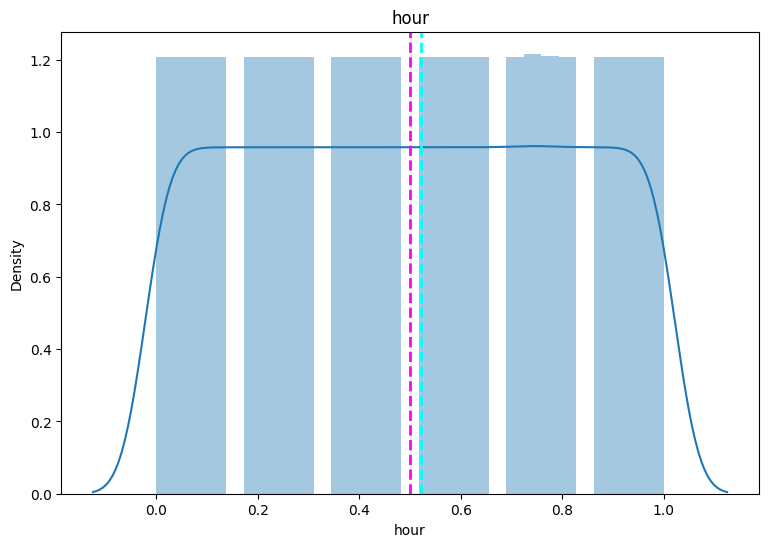

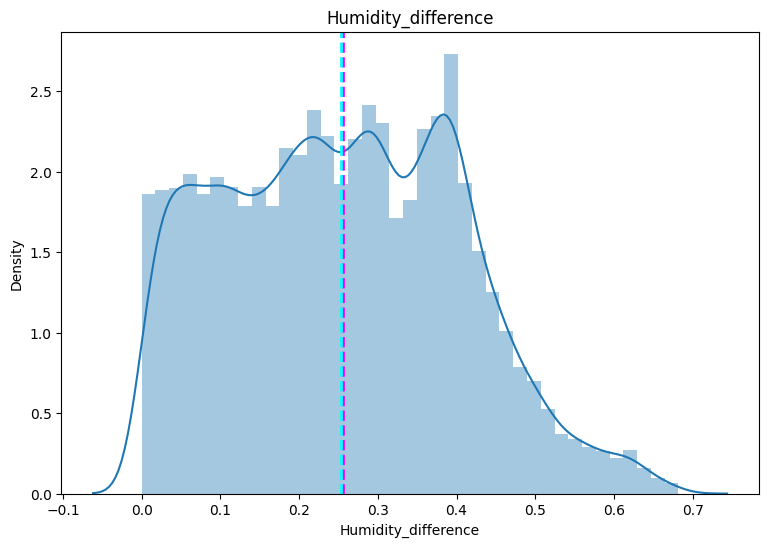

In [33]:
# Transform Your data
#check distribution  of all independent features
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

In [34]:
columns  = ['Appliances','hu_build_out',	'Windspeed',	'Tdewpoint',	'month'	,'weekday'	,'hour'	,'Humidity_difference']
for col  in columns :
  skewness = df_removed[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )

The skweness of  Appliances is 1.1561567288129544
The skweness of  hu_build_out is -0.24196120045189218
The skweness of  Windspeed is 0.7901296668359546
The skweness of  Tdewpoint is 0.2390173811427778
The skweness of  month is -0.06796901264352721
The skweness of  weekday is 0.019354272409647853
The skweness of  hour is -0.0006730500938671791
The skweness of  Humidity_difference is 0.20719988692468277


In [35]:
# Transform Your data
df_removed['Appliances']=df_removed['Appliances'].apply(lambda x:np.log10(x+1))
df_removed['Windspeed']=df_removed['Windspeed'].apply(lambda x:np.log10(x+1))
     

C:\Users\sahun\AppData\Local\Temp\ipykernel_20360\2791869075.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sahun\AppData\Local\Temp\ipykernel_20360\2791869075.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\sahun\AppData\Local\Temp\ipykernel_20360\519015004.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sahun\AppData\Local\Temp\ipykernel_20360\519015004.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sahun\AppData\Local\Temp\ipykernel_20360\519015004.py:6: UserWarning:



`distplot` is a 

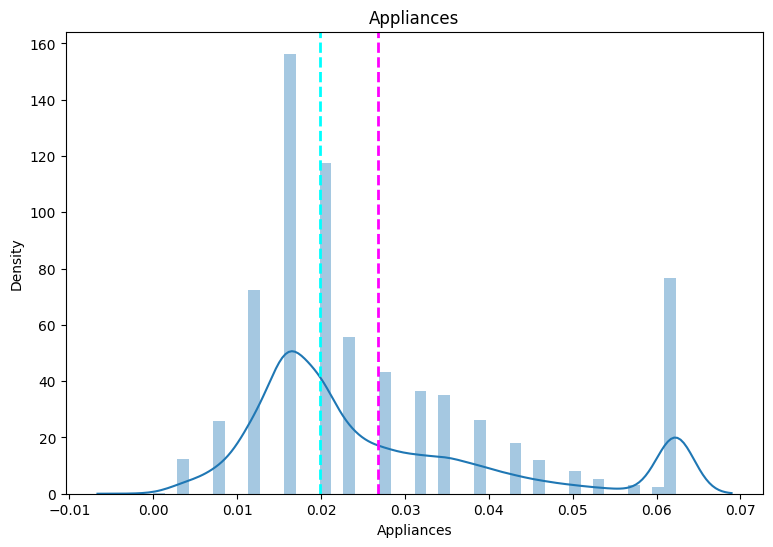

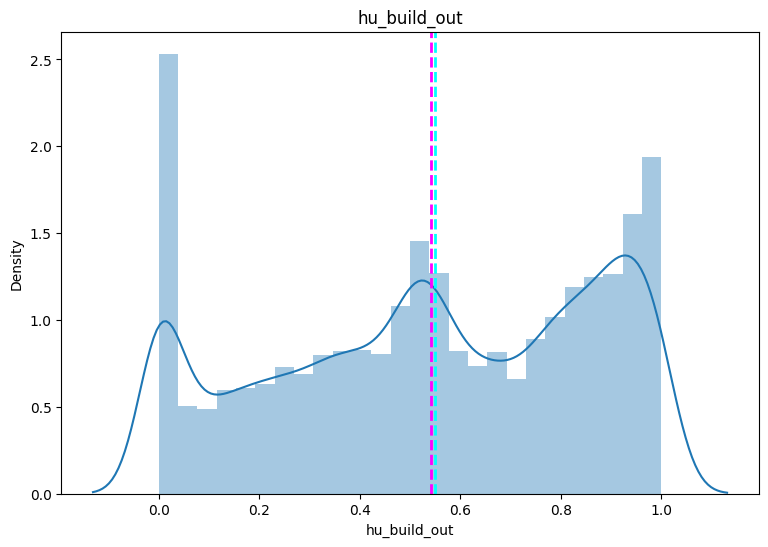

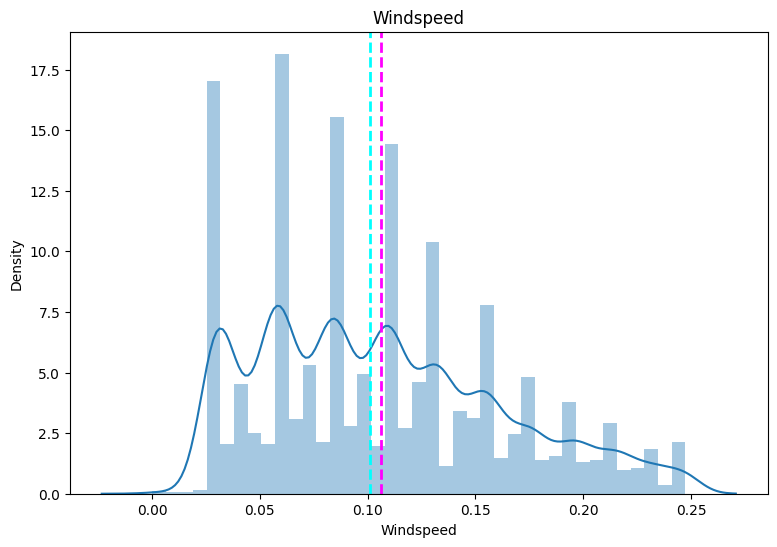

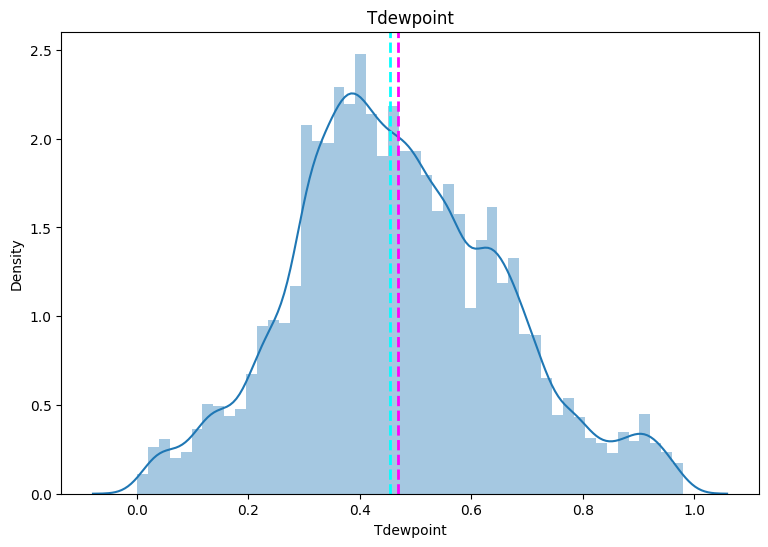

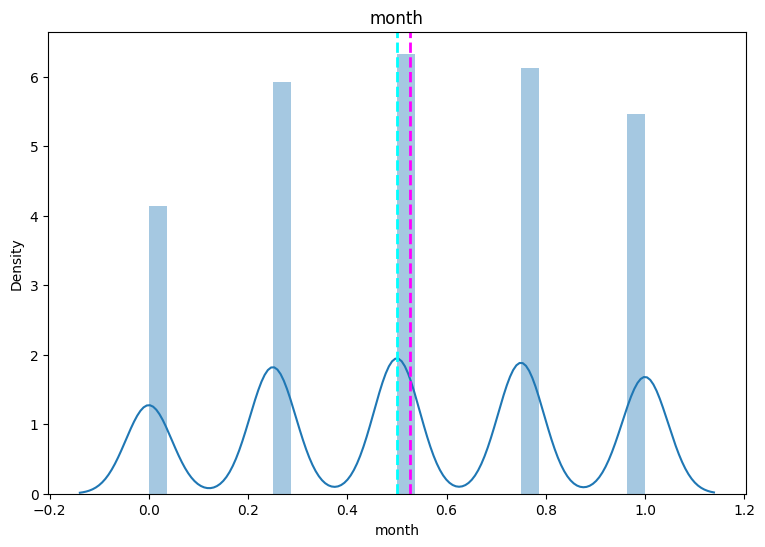

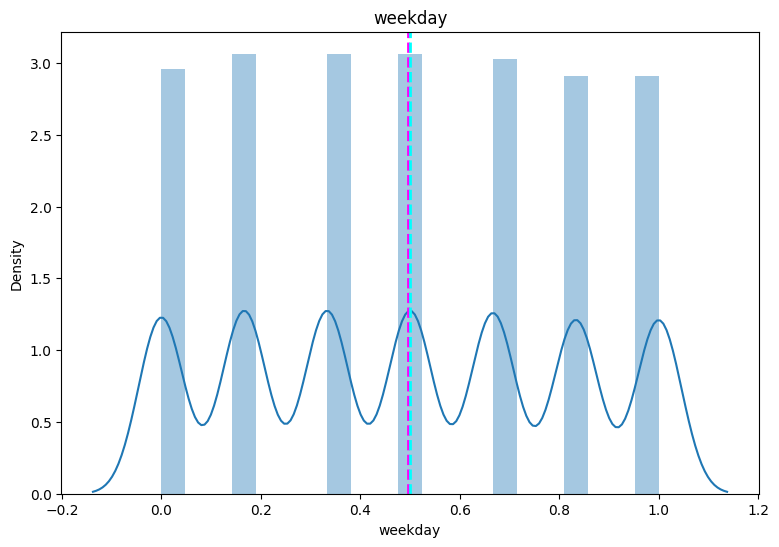

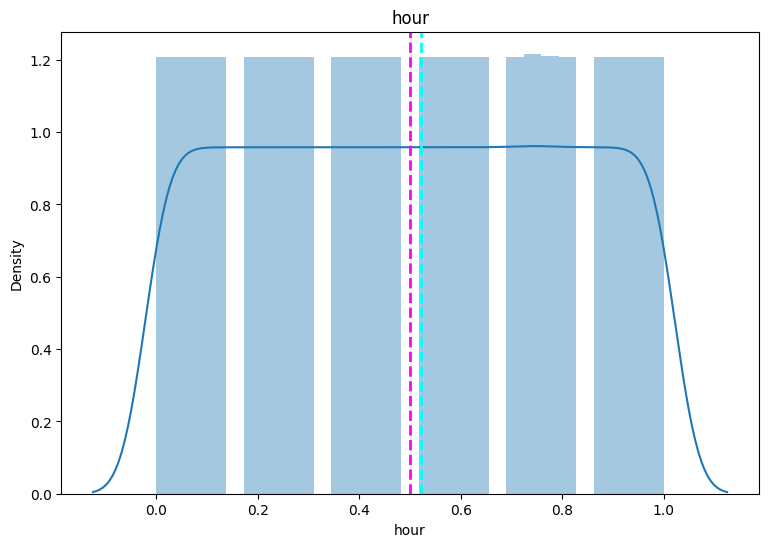

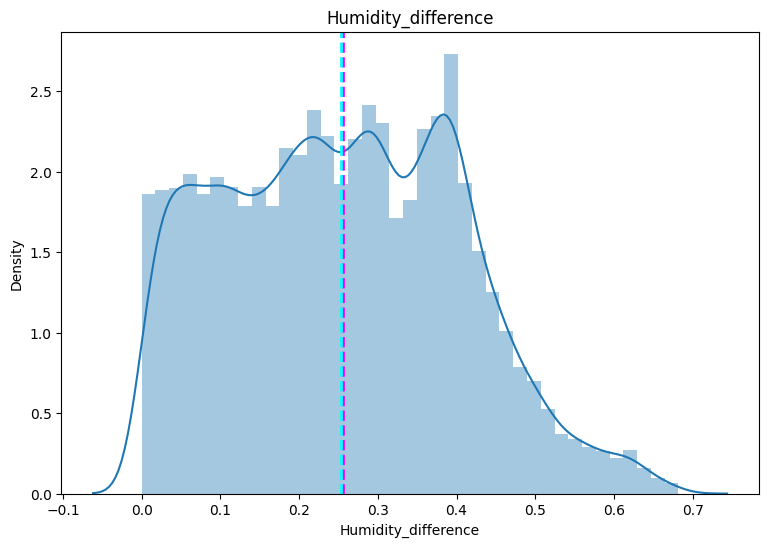

In [36]:
# check the distribution of the features after transformation
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

In [59]:
df_removed.sample(5)

Appliances  hu_build_out  Windspeed  Tdewpoint  month   weekday  \
13706    0.035074      0.485002   0.117113   0.690799   0.75  0.666667   
6216     0.031314      0.840142   0.029963   0.361991   0.25  0.166667   
10342    0.015939      0.358611   0.124939   0.503771   0.50  0.333333   
2718     0.062283      1.000000   0.109144   0.520362   0.00  0.833333   
12721    0.012009      0.436434   0.057992   0.503771   0.75  0.833333   

           hour  Humidity_difference  
13706  0.913043             0.026935  
6216   0.913043             0.393909  
10342  0.521739             0.067338  
2718   0.608696             0.308194  
12721  0.043478             0.055987

# Data Scaling

In [38]:
from scipy.stats import zscore
# Scaling your data
Features  = ['hu_build_out',	'Windspeed',	'Tdewpoint',	'month'	,'weekday'	,'hour'	,'Humidity_difference']
X = df_removed[Features]
#X.shape

In [39]:
y = df_removed['Appliances']
#y =np.log10(df_removed['Appliances'])

# Data Splitting

In [40]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
     

# Scaling your data
# Scaling your data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

(15788, 7)
(3947, 7)


# ML Model Implementation

## ML Model - 1 Linear Regression

In [41]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
linear_reg =  LinearRegression().fit(X_train_scaled,y_train)

print(linear_reg.score(X_train_scaled,y_train))


# Predict on the model
y_pred = linear_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
     

0.15527115208556463
MSE : 0.0014091281746122677
RMSE : 0.037538356045680364
R2 : 0.1336089955467601
Adjusted R2 :  0.13206933141089494


In [42]:
# ML Model - 1 Implementation
#LinearRegresseion
lr=LinearRegression()
# Fit the LinearRegression
lr.fit(X_train_scaled,y_train)
#predict the target values of train data
lr_train=lr.predict(X_train_scaled)
# Predict the target values for the test data
y_pred_lr = lr.predict(X_test_scaled)
#Evaluate the model using
mse_lr_train=mean_squared_error(y_train,lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
r2_lr_train=r2_score(y_train,lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr)

print("LinearRegression Mean Squared Error:",mse_lr_test)
print("LinearRegression R^2 Score:",r2_lr_test)


##Ridge
ridge = Ridge()
# Fit the Ridge model
ridge.fit(X_train_scaled, y_train)
#predict the target values of train data
r_train=ridge.predict(X_train_scaled)
# Predict  values for the test data
y_pred_r = ridge.predict(X_test_scaled)
# Evaluate the model using metrics
mse_r_train=mean_squared_error(y_train,r_train)
mse_r_test = mean_squared_error(y_test, y_pred_r)
r2_r_train=r2_score(y_train,r_train)
r2_r_test = r2_score(y_test, y_pred_r)

print("Ridge Mean Squared Error:",mse_r_test)
print("Ridge R^2 Score:",r2_r_test)


#Lasso
lasso = Lasso()
# Fit the Lasso model on the training data
lasso.fit(X_train_scaled, y_train)
#predict the target values of train data
l_train=ridge.predict(X_train_scaled)
# Predict the target values for the test data
y_pred_l = lasso.predict(X_test_scaled)
# Evaluate the model using metrics
mse_l_train=mean_squared_error(y_train,l_train)
mse_l_test = mean_squared_error(y_test, y_pred_l)
r2_l_train=r2_score(y_train,l_train)
r2_l_test = r2_score(y_test, y_pred_l)

print("Lasso Mean Squared Error:",mse_l_test)
print("Lasso R^2 Score:",r2_l_test)

LinearRegression Mean Squared Error: 0.00022400362494141526
LinearRegression R^2 Score: 0.1376739190246119
Ridge Mean Squared Error: 0.0002239988555325365
Ridge R^2 Score: 0.1376922793777895
Lasso Mean Squared Error: 0.00025979981207225575
Lasso R^2 Score: -0.0001273588362813438


In [43]:
#checking the intercepts
print("The Intercepts obtain from linearrgression model",lr.intercept_)
print("The Intercepts obtain from Ridge model",ridge.intercept_)
print("The Intercepts obtain from Lasso model",lasso.intercept_)

The Intercepts obtain from linearrgression model 0.0204372818272971
The Intercepts obtain from Ridge model 0.02042023868545294
The Intercepts obtain from Lasso model 0.02675990637560946


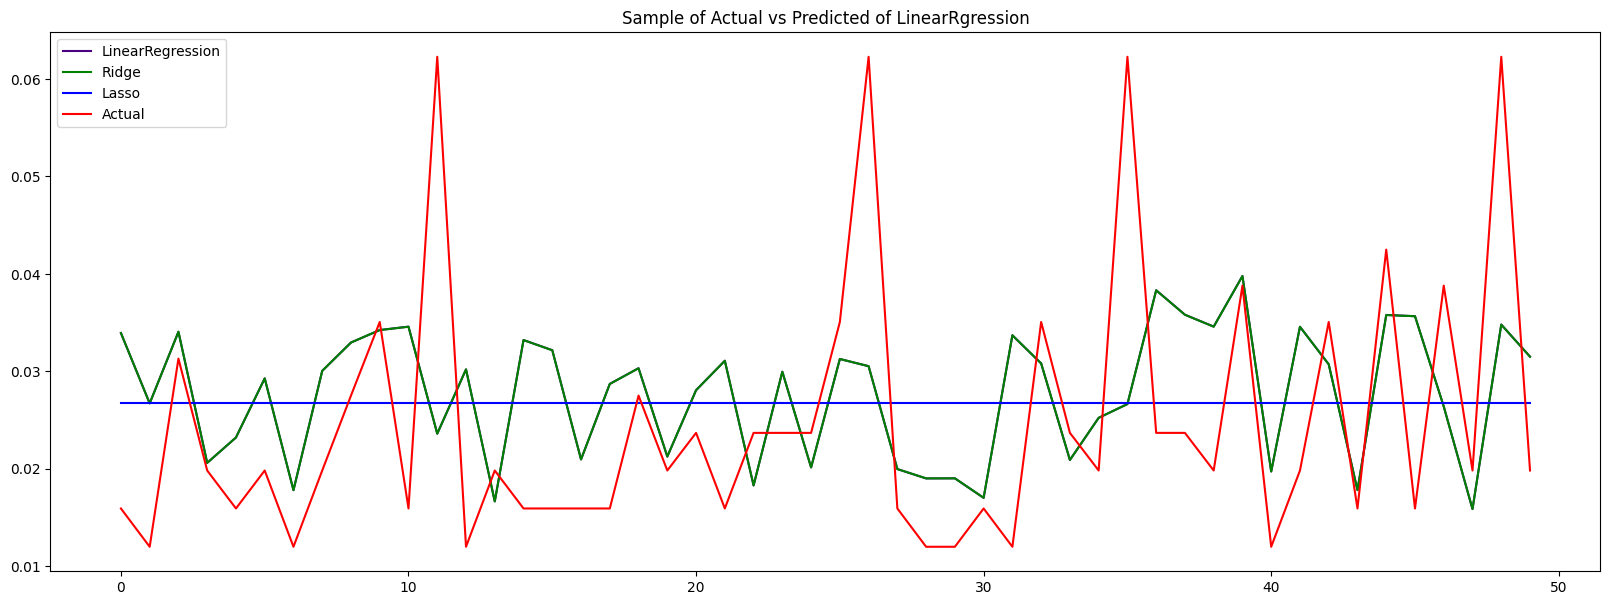

In [44]:
# Visualizing evaluation Metric Score chart
## Plot the predicted vs actual values
plt.figure(figsize=(20,7))
plt.plot(((y_pred_lr)[500:550]),color='indigo')
plt.plot(((y_pred_r)[500:550]),color='green')
plt.plot(((y_pred_l)[500:550]),color='blue')
plt.plot((np.array((y_test)[500:550])),color='red')
plt.legend(["LinearRegression","Ridge","Lasso","Actual"])
plt.title("Sample of Actual vs Predicted of LinearRgression" )
plt.show()

### Cross- Validation & Hyperparameter Tuning

In [45]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_params = {'alpha': [0.001, 0.01,0.1,0.5, 1,2,5]}
lasso_params = {'alpha': [0.0001, 0.001,0.01, 0.1,0.2,0.5,1]}

# Create Ridge and Lasso regression objects
ridge = Ridge()
lasso = Lasso()

# Create GridSearchCV objects
ridge_cv = GridSearchCV(ridge, param_grid=ridge_params, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(lasso, param_grid=lasso_params, scoring='neg_mean_squared_error')

# Fit the models using GridSearchCV
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
# Get the best hyperparameters and fit the models again using the best hyperparameters
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha']).fit(X_train_scaled, y_train)

#predict the train data using the best models
y_train_ridge=ridge_best.predict(X_train_scaled)
y_train_lasso = lasso_best.predict(X_train_scaled)
# Predict  values for the test data using the best models
y_pred_ridge = ridge_best.predict(X_test_scaled)
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Evaluate
mse_ridge_train = mean_squared_error(y_train, y_train_ridge)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge)
r2_ridge_train = r2_score(y_train, y_train_ridge)
r2_ridge_test = r2_score(y_test, y_pred_ridge)
mse_lasso_train = mean_squared_error(y_train, y_train_lasso)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso)
r2_lasso_train = r2_score(y_train, y_train_lasso)
r2_lasso_test = r2_score(y_test, y_pred_lasso)
# Print the evaluation metrics for both models
print("Ridge Regression - Best Alpha:" , ridge_cv.best_params_['alpha'])
print("Ridge Mean Squared Error:",(mse_ridge_test))
print("Ridge R^2 Score:",(r2_ridge_test))
mse_percent_ridge = mse_ridge_test * 100
r2_percent_ridge = r2_ridge_test * 100
print("Ridge - Mean squared error: {:.2f}%".format(mse_percent_ridge))
print("Ridge - R-squared: {:.2f}%".format(r2_percent_ridge))

print("\nLasso Regression - Best Alpha:",lasso_cv.best_params_['alpha'])
print("Lasso Mean Squared Error:",(mse_lasso_test))
print("Lasso R^2 Score:",(r2_lasso_test))

mse_percent_lasso = mse_lasso_test * 100
r2_percent_lasso = r2_lasso_test * 100
print("Lasso - Mean squared error: {:.2f}%".format(mse_percent_lasso))
print("Lasso - R-squared: {:.2f}%".format(r2_percent_lasso))
# Fit the Algorithm

# Predict on the model

Ridge Regression - Best Alpha: 5
Ridge Mean Squared Error: 0.00022398086975614968
Ridge R^2 Score: 0.13776151756118504
Ridge - Mean squared error: 0.02%
Ridge - R-squared: 13.78%

Lasso Regression - Best Alpha: 0.0001
Lasso Mean Squared Error: 0.00022469422107802543
Lasso R^2 Score: 0.1350153948146775
Lasso - Mean squared error: 0.02%
Lasso - R-squared: 13.50%


In [46]:
#create a list of metric score of linear regression
list_lr=['LinearRegression',mse_l_train,mse_l_test,r2_l_train,r2_l_test]
#create a empty dataframe for metric score columns
score = pd.DataFrame(columns = ['Model' , 'Train MSE', 'Test MSE' , 'Train R2_Score', 'Test R2_Score'])
#add the rows to the dataframe of linearrgression
score.loc[len(score)]=list_lr
#create a list of ridge metric score after hyperparameter tuning
list_ridge=['Ridge',mse_ridge_train,mse_ridge_test,r2_ridge_train,r2_ridge_test]
#add the rows to the dataframe
score.loc[len(score)]=list_ridge
#create a list of lasso metric score after hyperparameter tuning
list_lasso=['Lasso',mse_lasso_train,mse_lasso_test,r2_lasso_train,r2_lasso_test]
#add the rows to the dataframe
score.loc[len(score)]=list_lasso
print(score)

              Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression   0.000217  0.000260        0.155271      -0.000127
1             Ridge   0.000217  0.000224        0.155268       0.137762
2             Lasso   0.000218  0.000225        0.150540       0.135015


## ML Model - 2 ElasticNet

In [47]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(X_train_scaled,y_train)

y_pred_en = elasticnet.predict(X_test)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
     

MSE : 0.001627846930616376
RMSE : 0.04034658511716172
R2 : -0.0008684537876866294
Adjusted R2 :  -0.0026470979045980503


C:\Users\sahun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but ElasticNet was fitted without feature names



### Cross- Validation & Hyperparameter Tuning

In [48]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train_scaled, y_train)

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)
# Fit the Algorithm
y_pred_elastic = elastic_regressor.predict(X_test_scaled)
# Predict on the model
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1)))

y_train_elastic=elastic_regressor.predict(X_train_scaled)

mse_en_train = mean_squared_error(y_train, y_train_elastic)
mse_en_test = mean_squared_error(y_test, y_pred_elastic)
r2_en_train = r2_score(y_train, y_train_elastic)
r2_en_test = r2_score(y_test, y_pred_elastic)
     

#create a list of decion tree regressor metric  score
dtr_list=['Elasticnet',mse_en_train,mse_en_test,r2_en_train,r2_en_test]
#add the rows by list
score.loc[len(score)]=dtr_list
score

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.8}

Using  {'alpha': 1e-08, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.00021738907164330586
MSE : 0.001409127756962988
RMSE : 0.03753835048271285
R2 : 0.13360925233502507
Adjusted R2 :  0.13206958865549856


Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression   0.000217  0.000260        0.155271      -0.000127
1             Ridge   0.000217  0.000224        0.155268       0.137762
2             Lasso   0.000218  0.000225        0.150540       0.135015
3        Elasticnet   0.000217  0.000224        0.155271       0.137674

## ML Model - 3 Decision Tree Regressor

In [49]:
# Visualizing evaluation Metric Score chart
# ML Model - 2 Implementation
# define the decision tree model
model = DecisionTreeRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_DT = mean_squared_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_DT)
print("R-squared: ", r2_DT)

Mean squared error:  0.00013011997429376979
R-squared:  0.49908914412117


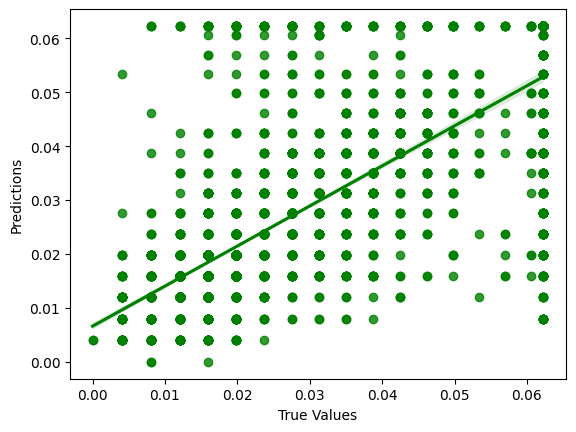

In [50]:
# Visualizing evaluation Metric Score chart
sns.regplot(x=y_test, y=y_pred, color='green')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Cross- Validation & Hyperparameter Tuning

In [51]:
#ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= {'max_depth': [None, 15, 20, 25],
              'min_samples_split': [20, 25, 30],
              'min_samples_leaf': [4, 8, 12]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

dt_best = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    random_state=0)

# Fit the Algorithm
dt_best.fit(X_train_scaled, y_train)

#predict on the training model
dtr_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = dt_best.predict(X_test_scaled)
#evaluate the model
mse_dsT_train=mean_squared_error(y_train,dtr_train)
mse_dsT_test = mean_squared_error(y_test, y_pred)
r2_dsT_train = r2_score(y_train, dtr_train)
r2_dsT_test = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_dsT_test)
print("R-squared: ", r2_dsT_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 20}
Mean squared error:  0.00011469013703730573
R-squared:  0.5584879645417528


In [52]:
#create a list of decion tree regressor metric  score
dtr_list=['DecisionTree',mse_dsT_train,mse_dsT_test,r2_dsT_train,r2_dsT_test]
#add the rows by list
score.loc[len(score)]=dtr_list
score

Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression   0.000217  0.000260        0.155271      -0.000127
1             Ridge   0.000217  0.000224        0.155268       0.137762
2             Lasso   0.000218  0.000225        0.150540       0.135015
3        Elasticnet   0.000217  0.000224        0.155271       0.137674
4      DecisionTree   0.000064  0.000115        0.752076       0.558488

### ML Model - 4. Extra Tree Regression

In [53]:
# Visualizing evaluation Metric Score chart
# ML Model - 4 Implementation
# define the decision tree model
model = ExtraTreesRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_br = mean_squared_error(y_test, y_pred)
r2_br = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_br)
print("R-squared: ", r2_br)

Mean squared error:  6.828181961076767e-05
R-squared:  0.7371417809768874


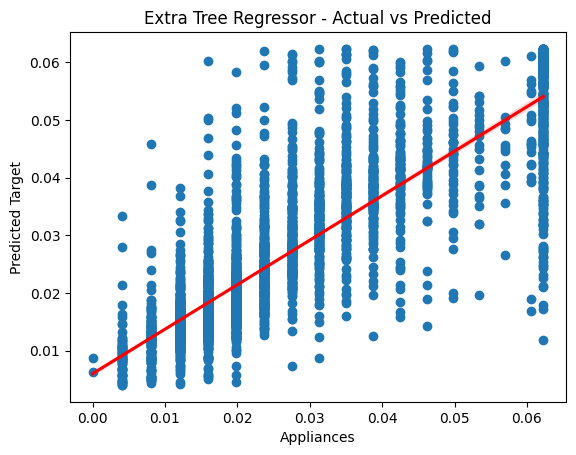

In [54]:
# Visualizing evaluation Metric Score chart
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Extra Tree Regressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

### Cross- Validation & Hyperparameter Tuning

In [55]:
#ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= { 'bootstrap': [True, False],
                          'max_depth': [70,100, None],
                          'criterion' :['squared_error'],
                          'max_features': ['log2', 'sqrt'],
                          'n_estimators': [10,1400,100]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

br_best = grid_search.best_estimator_

# Fit the Algorithm
br_best.fit(X_train_scaled, y_train)

#predict on the training model
br_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = br_best.predict(X_test_scaled)
#evaluate the model
mse_br_train=mean_squared_error(y_train,br_train)
mse_br_test = mean_squared_error(y_test, y_pred)
r2_br_train = r2_score(y_train, br_train)
r2_br_test = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_br_test)
print("R-squared: ", r2_br_test)

Best parameters: {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 70, 'max_features': 'log2', 'n_estimators': 1400}
Mean squared error:  6.767262509074361e-05
R-squared:  0.7394869408962478


In [56]:
#create a list of extra tree regressor metric  score
br_list=['ExtraTreeRegressor',mse_br_train,mse_br_test,r2_br_train,r2_br_test]
#add the rows by list
score.loc[len(score)]=br_list
score

Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression   0.000217  0.000260        0.155271      -0.000127
1               Ridge   0.000217  0.000224        0.155268       0.137762
2               Lasso   0.000218  0.000225        0.150540       0.135015
3          Elasticnet   0.000217  0.000224        0.155271       0.137674
4        DecisionTree   0.000064  0.000115        0.752076       0.558488
5  ExtraTreeRegressor   0.000064  0.000068        0.752076       0.739487

<Axes: title={'center': 'R2 Score Results'}, xlabel='Model'>

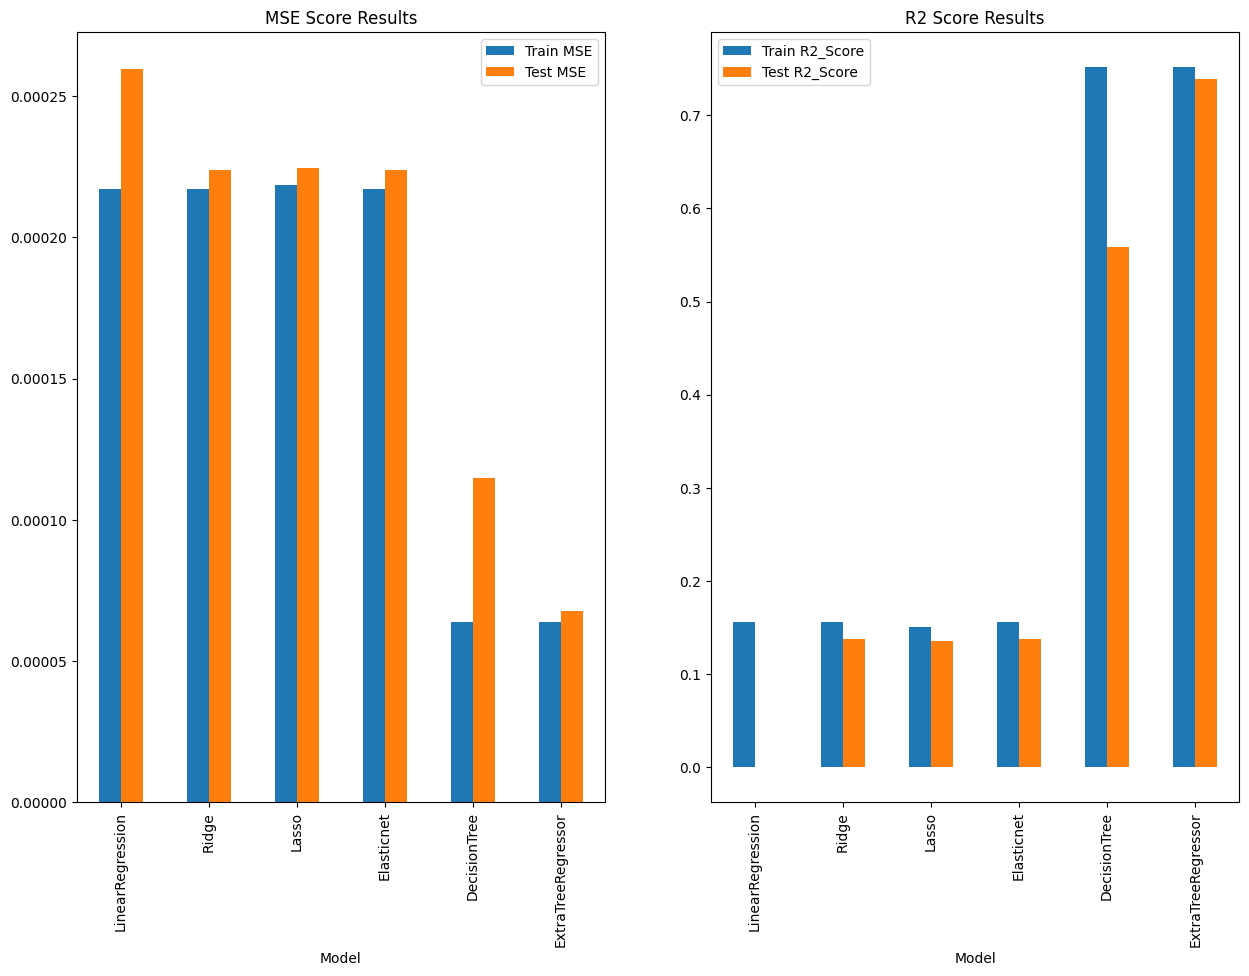

In [57]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
#plot the mse of all model
score.plot(x="Model", y=['Train MSE' , 'Test MSE'], kind="bar" , title = 'MSE Score Results',ax=ax[0])
#plot the r2_score of all model
score.plot(x="Model", y=['Train R2_Score' , 'Test R2_Score'], kind="bar" , title = 'R2 Score Results',ax=ax[1])

In [58]:
# Save the File
filename = 'finalized_model.sav'
pickle.dump(br_best, open(filename, 'wb'))